#**Capstone Project**

#**PROJECT OBJECTIVE:**
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.

#**Milestone 1:**

**Step 1: Import the data [ 3 points ]**

In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [343]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [344]:
# importing the CSV file
data = pd.read_excel("/content/drive/MyDrive/Datasets/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx")

In [345]:
data.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [346]:
data.shape

(425, 11)

**Step 2: Data cleansing [ 5 points ]**



**Steps followed for Data Cleansing:**
1. Check for missing values in the data set
2. Check for duplicate entries in the data set
3. Perform EDA for all the relevant features present in the data set
4. Drop the columns that represents unique identifiers, such as Unnamed, Data, Countries, Local, Genre, Employee or Third Party, Potential Accident Risk.
5. Encoding the target variable - Accident Level, into numerical variables for ease of representation.
6. Again, check for any duplicates after removing unwanted features.
7. Get final shape of the dataset, before NLP Preprocessing.

In [347]:
#Creating a back up of original data set, before further processing
df = data

In [348]:
#Checking for missing values in the data
for i in data.columns:
    df_na = data[i].isnull().sum()
    df_total = data[i].shape[0]
    print("Missing value percentage for column {0} is {1:0.2f}%".format(i,df_na/df_total*100))

Missing value percentage for column Unnamed: 0 is 0.00%
Missing value percentage for column Data is 0.00%
Missing value percentage for column Countries is 0.00%
Missing value percentage for column Local is 0.00%
Missing value percentage for column Industry Sector is 0.00%
Missing value percentage for column Accident Level is 0.00%
Missing value percentage for column Potential Accident Level is 0.00%
Missing value percentage for column Genre is 0.00%
Missing value percentage for column Employee or Third Party is 0.00%
Missing value percentage for column Critical Risk is 0.00%
Missing value percentage for column Description is 0.00%


In [349]:
#Checking for duplicate rows in the dataset
data.duplicated().sum()

0

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


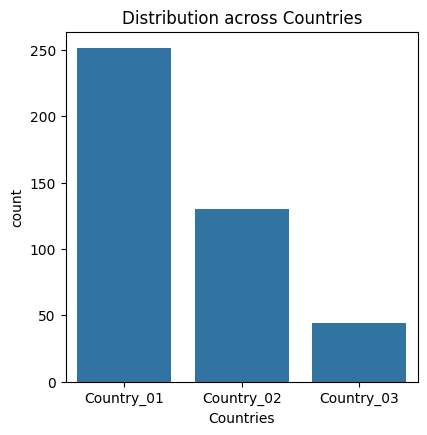

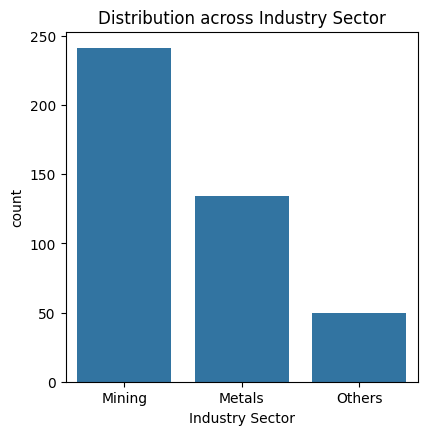

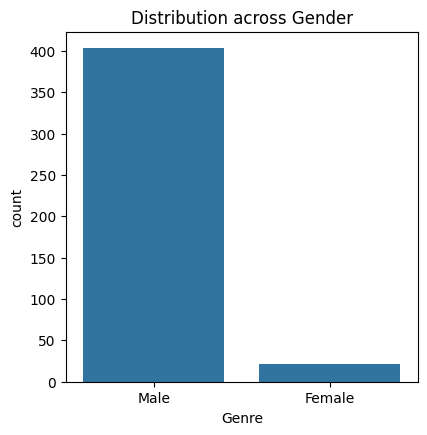

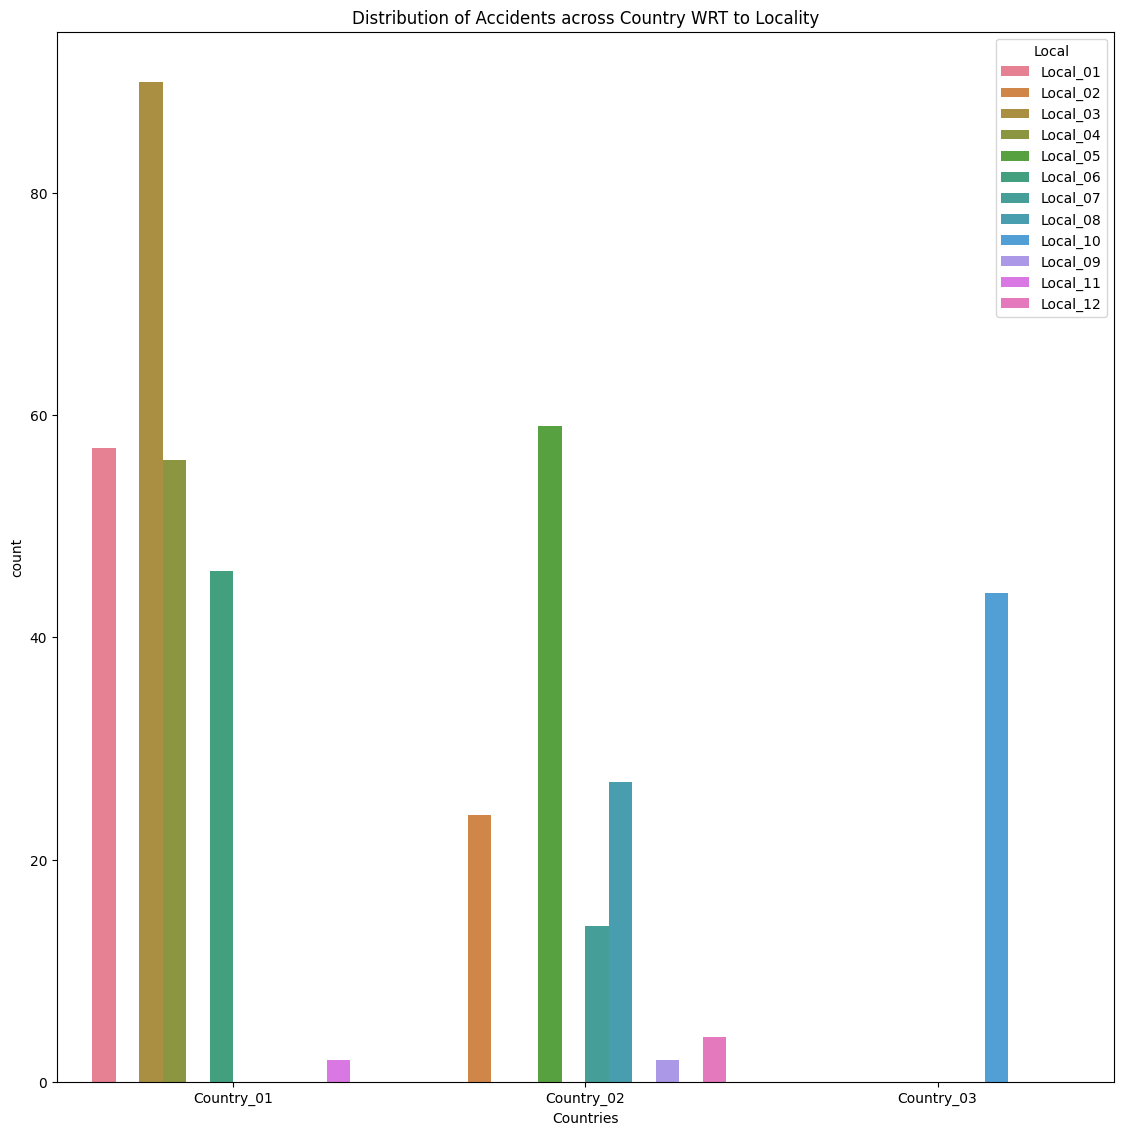

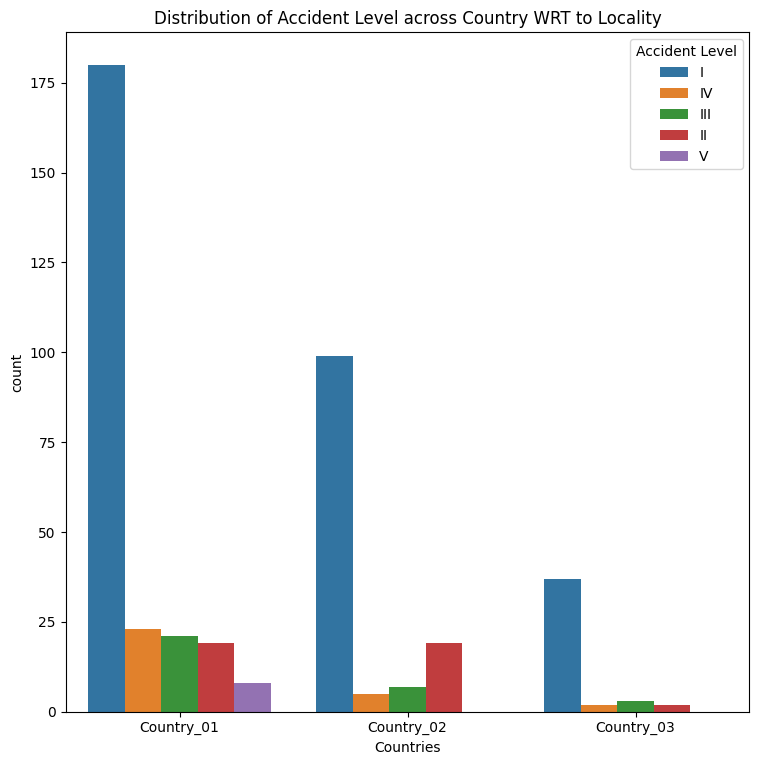

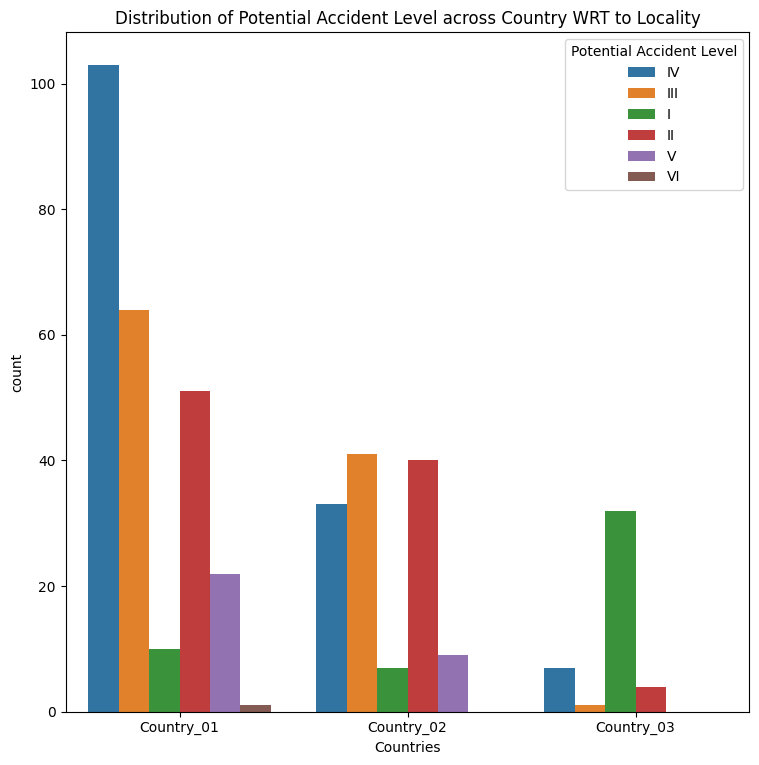

In [351]:
#Univariate and Bivariate Analysis of given features
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(x='Countries',data=data)
plt.title('Distribution across Countries');

plt.figure(figsize = (10,10))
plt.subplot(2,2,2)
sns.countplot(x='Industry Sector',data=data)
plt.title('Distribution across Industry Sector');

plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
sns.countplot(x='Genre',data=data)
plt.title('Distribution across Gender');

plt.figure(figsize = (30,30))
plt.subplot(2,2,4)
sns.countplot(x='Countries',data=data,hue='Local')
plt.title('Distribution of Accidents across Country WRT to Locality');

plt.figure(figsize = (30,30))
plt.subplot(3,3,1)
sns.countplot(x='Countries',data=data,hue='Accident Level')
plt.title('Distribution of Accident Level across Country WRT to Locality');

plt.figure(figsize = (30,30))
plt.subplot(3,3,2)
sns.countplot(x='Countries',data=data,hue='Potential Accident Level')
plt.title('Distribution of Potential Accident Level across Country WRT to Locality');

The dataset provided here is imbalanced.

- Accident Level I has the highest number of records (316), indicating it is the most common accident level in the dataset.
- Accident Level II has the second-highest number of records (40), which is considerably lower than Level I but higher than other levels.
- Accident Level III has the third-highest number of records (31), indicating a lower frequency compared to Levels I and II but higher than Levels IV and V.
- Accident Level IV has the lowest number of records (30) among the accident levels, suggesting it is less common in the dataset.
- Accident Level V has the lowest number of records (8), indicating it is the least frequent accident level in the dataset.

In [352]:
data['Critical Risk'].value_counts()

Critical Risk
Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machin

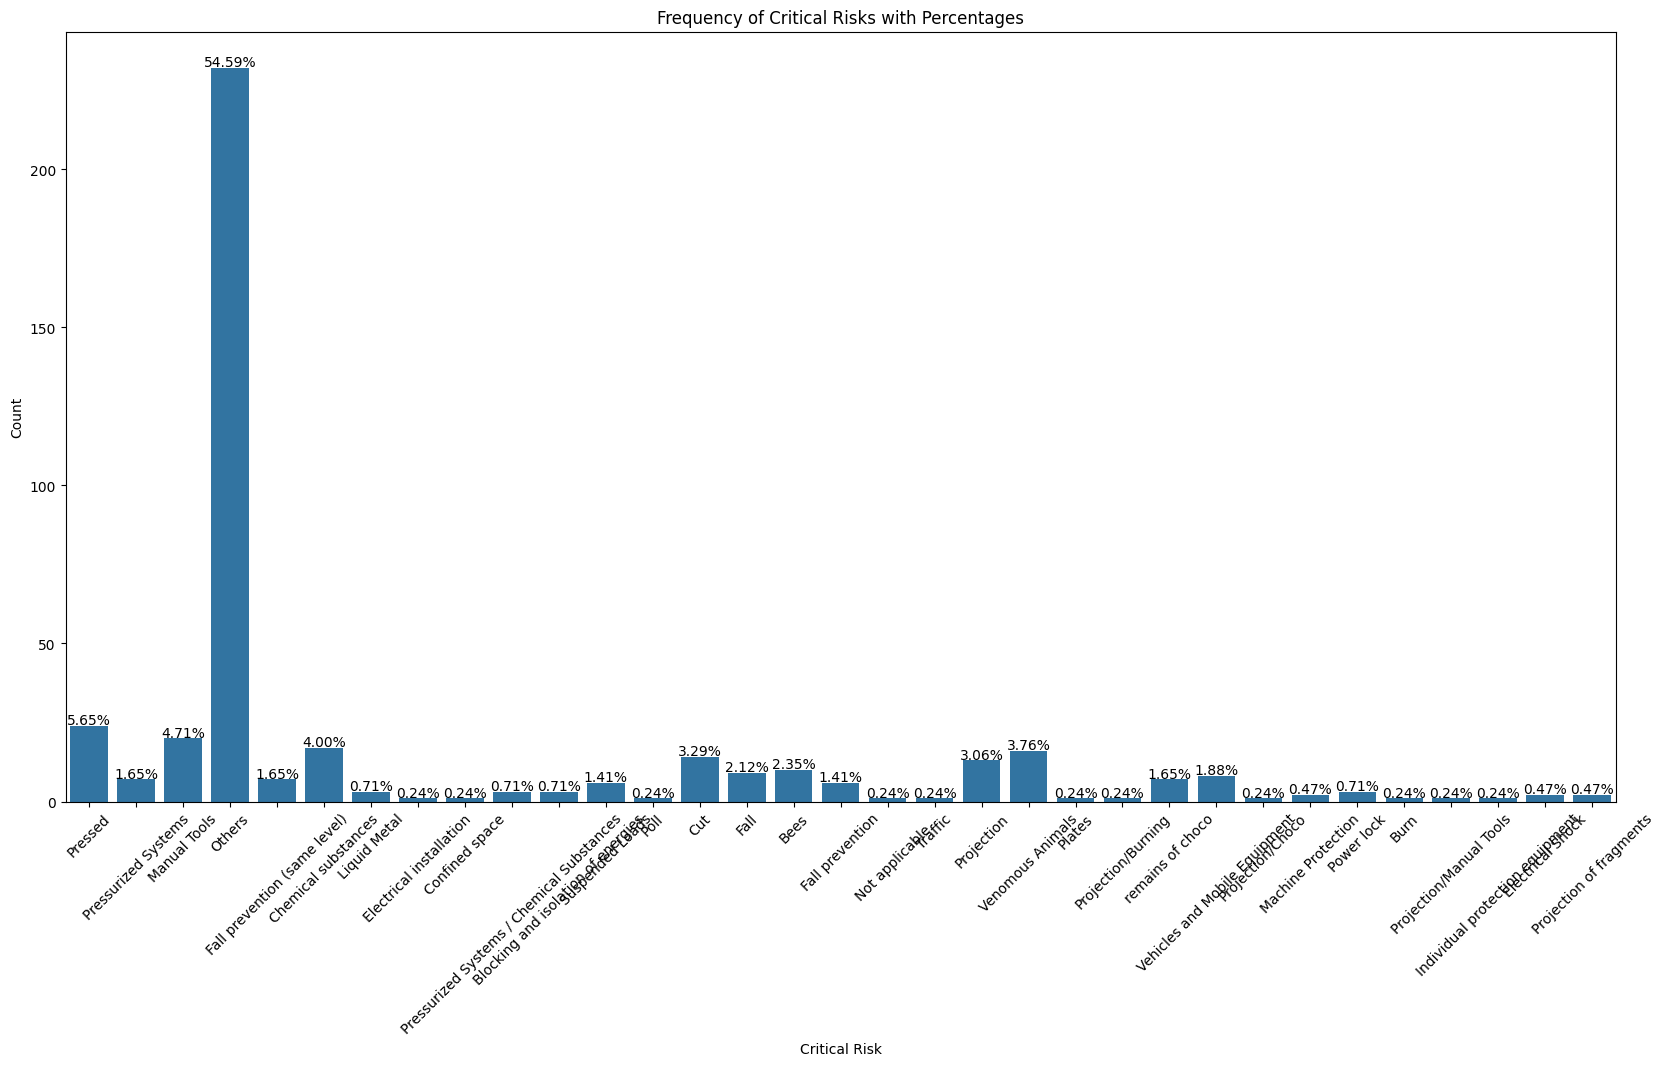

In [353]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Critical Risk', ax=ax)

# Calculate percentages and annotate the bars
total = float(len(data))  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format((height / total) * 100), ha='center')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set labels and title
ax.set_xlabel('Critical Risk')
ax.set_ylabel('Count')
ax.set_title('Frequency of Critical Risks with Percentages')

# Display the plot
plt.show()

Observation:-
Under Critical Risk column there are 33 categories present in the dataset, out of which:

- Others category is highest - 232 which is 54.59%
- Pressed is second highest - 24 which is 5.65% in that category.
- Manual Tools category is third highest - 20 which is 4.71% in that category.

Now, we can drop the independent variables from the dataset (which will not help in identifying the target variable - Accident Level) like:
1. Column 0 --> Unnamed (Serial No. identifier)
2. Countries --> Unique Identifier
3. Local --> Unique Identifier
4. Genre --> Unique Identifier
5. Employee or Third Party --> Employee Unique Identifier

In [354]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [355]:
data = data.drop(['Unnamed: 0','Data', 'Countries', 'Local','Genre','Employee or Third Party'], axis=1)
data.head()

Industry Sector Accident Level Potential Accident Level  \
0          Mining              I                       IV   
1          Mining              I                       IV   
2          Mining              I                      III   
3          Mining              I                        I   
4          Mining             IV                       IV   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [356]:
#Also we can drop the column 'Potential Accident Level' being dependent variable
data = data.drop(['Potential Accident Level'], axis=1)
data.head()

Industry Sector Accident Level        Critical Risk  \
0          Mining              I              Pressed   
1          Mining              I  Pressurized Systems   
2          Mining              I         Manual Tools   
3          Mining              I               Others   
4          Mining             IV               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [357]:
#For clear understanding, lets replace the Accident Level values by numerical values(1 means not severe but 6 means very severe)
data['Accident Level'] = data['Accident Level'].replace({"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6})
data.head()

Industry Sector  Accident Level        Critical Risk  \
0          Mining               1              Pressed   
1          Mining               1  Pressurized Systems   
2          Mining               1         Manual Tools   
3          Mining               1               Others   
4          Mining               4               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [358]:
#Again checking for duplicate rows in the dataset
data.duplicated().sum()

10

In [359]:
#Dropping the duplicate rows in the dataset
data.drop_duplicates(inplace=True)
data.head()

Industry Sector  Accident Level        Critical Risk  \
0          Mining               1              Pressed   
1          Mining               1  Pressurized Systems   
2          Mining               1         Manual Tools   
3          Mining               1               Others   
4          Mining               4               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [360]:
data.shape

(415, 4)

**Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]**

**Steps followed for NLP Preprocessing techniques:**
1. Concatenating the independent column variables to get the final description
2. Converting dataset into lower case
3. Removing non-word and non-whitespace characters
4. Removing the digits/numbers
5. Removing the stopwords and tokenize the description
6. Applying stemming/lemmatization technique to get to the root of the word

**Implementing different word embedding techniques - followed by basic machine learning classifiers:**
1. TFIDF
2. CountVectorizer
3. FastText
4. Word2Vec
5. GloVe

In [361]:
#Concatenating the columns Industry Sector, Critical Risk and Description
data ['Total Description'] = data['Industry Sector'] + " " + data['Critical Risk'] + " " + data['Description'].astype(str)
data.head()

Industry Sector  Accident Level        Critical Risk  \
0          Mining               1              Pressed   
1          Mining               1  Pressurized Systems   
2          Mining               1         Manual Tools   
3          Mining               1               Others   
4          Mining               4               Others   

                                         Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   
4  Approximately at 11:45 a.m. in circumstances t...   

                                   Total Description  
0  Mining Pressed While removing the drill rod of...  
1  Mining Pressurized Systems During the activati...  
2  Mining Manual Tools In the sub-station MILPO l...  
3  Mining Others Being 9:45 am. approximately in ...  
4  Mining Others Approximately at 11:45 a.m. in c...

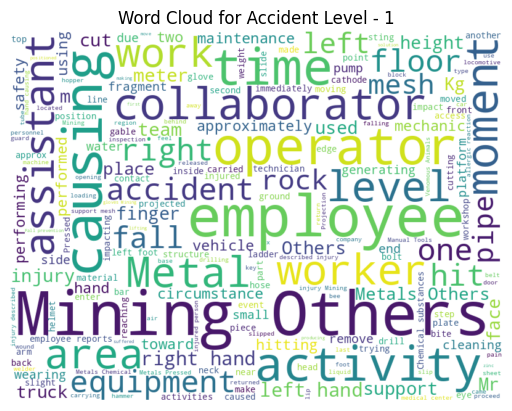

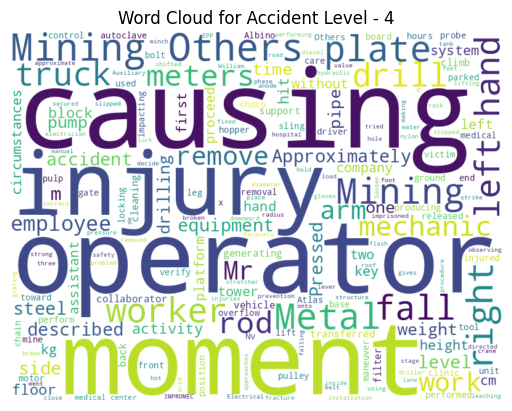

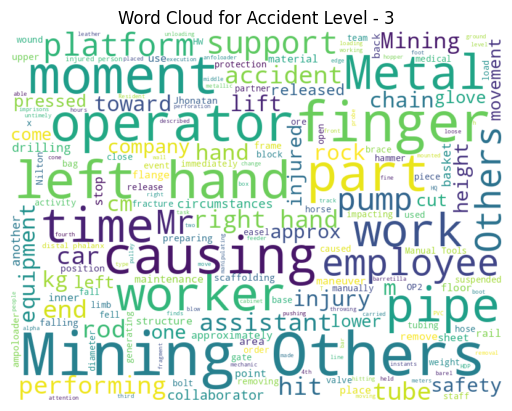

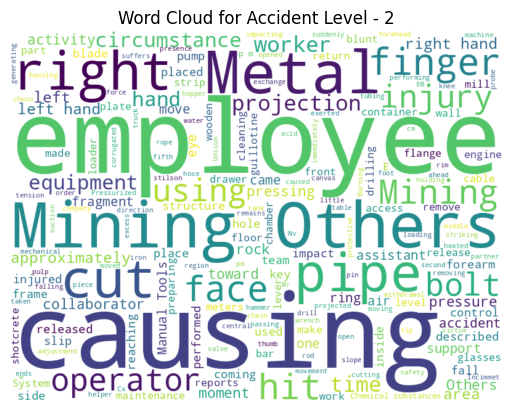

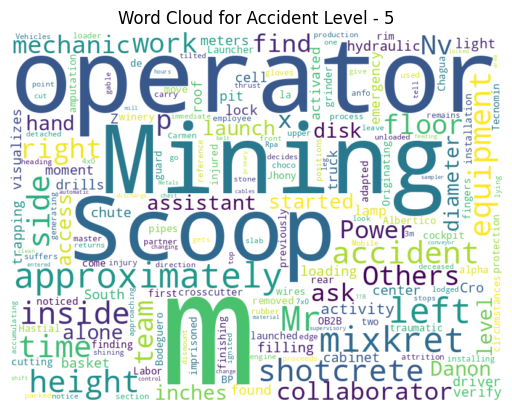

In [362]:
from wordcloud import WordCloud

for i in data['Accident Level'].unique():
  text = " ".join(data['Total Description'].where(data['Accident Level'] == i).dropna().astype(str))
  wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)
  plt.title("Word Cloud for Accident Level - "+str(i))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show();

In [363]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [364]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]','', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Remove digits
    words = [word for word in words if not word.isdigit()]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(words)

In [365]:
# Apply the clean_text function to the 'Description' column
data['Cleaned_Description'] = data['Total Description'].apply(clean_text)

# Display the cleaned DataFrame
data.head()
data['Cleaned_Description'][0]

'mine press remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo'

In [366]:
data.to_csv("/content/drive/MyDrive/Datasets/cleansed_data.csv",columns=['Cleaned_Description'], header=None, index=False)

In [367]:
#word embeddings
!pip install fasttext
import fasttext
import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [368]:
# Word embeddings using TFIDF
tfidf_model = TfidfVectorizer()
tfidf_matrix = tfidf_model.fit_transform(data['Cleaned_Description'])

feature_names = tfidf_model.get_feature_names_out()
embeddings = tfidf_matrix.toarray()
X_tfidf = pd.DataFrame(embeddings, columns=feature_names)
X_tfidf.head()

02bp0166  02bp0167  02mx015mx010m  042tc06  06m  07m  080m  080mt  \
0       0.0       0.0            0.0      0.0  0.0  0.0   0.0    0.0   
1       0.0       0.0            0.0      0.0  0.0  0.0   0.0    0.0   
2       0.0       0.0            0.0      0.0  0.0  0.0   0.0    0.0   
3       0.0       0.0            0.0      0.0  0.0  0.0   0.0    0.0   
4       0.0       0.0            0.0      0.0  0.0  0.0   0.0    0.0   

   08fi0502  090m  ...  z014  z132  z332       zaf  zamac  zero  zinc  zinco  \
0       0.0   0.0  ...   0.0   0.0   0.0  0.000000    0.0   0.0   0.0    0.0   
1       0.0   0.0  ...   0.0   0.0   0.0  0.000000    0.0   0.0   0.0    0.0   
2       0.0   0.0  ...   0.0   0.0   0.0  0.000000    0.0   0.0   0.0    0.0   
3       0.0   0.0  ...   0.0   0.0   0.0  0.000000    0.0   0.0   0.0    0.0   
4       0.0   0.0  ...   0.0   0.0   0.0  0.204311    0.0   0.0   0.0    0.0   

    zn  zone  
0  0.0   0.0  
1  0.0   0.0  
2  0.0   0.0  
3  0.0   0.0  
4  0.0   0.0  

[5 rows x 2568 columns]

In [369]:
# Word embeddings using Count Vectorizer
CVect_model = CountVectorizer(max_features = 1000)
CVect_matrix = CVect_model.fit_transform(data['Cleaned_Description'])

feature_names = CVect_model.get_feature_names_out()
embeddings = CVect_matrix.toarray()
X_Cvect = pd.DataFrame(embeddings, columns=feature_names)
X_Cvect.head()

1st  2m  2nd  3cm  3m  3rd  4th  5th  able  abruptly  ...  worker  workers  \
0    0   0    0    0   0    0    0    0     0         0  ...       0        0   
1    0   0    0    0   0    0    0    0     0         0  ...       0        0   
2    0   0    0    0   0    0    0    0     0         0  ...       0        0   
3    0   0    0    0   0    0    0    0     0         0  ...       0        0   
4    0   0    0    0   0    0    0    0     0         0  ...       1        0   

   workshop  would  wrench  wrist  yield  zinc  zn  zone  
0         0      0       0      0      0     0   0     0  
1         0      0       0      0      0     0   0     0  
2         0      0       0      0      0     0   0     0  
3         0      0       0      0      0     0   0     0  
4         0      0       0      0      0     0   0     0  

[5 rows x 1000 columns]

In [370]:
# Word embeddings using Fasttext

fasttext_model = fasttext.train_unsupervised("/content/drive/MyDrive/Datasets/cleansed_data.csv")
fasttext_matrix = [fasttext_model.get_word_vector(word) for word in data['Cleaned_Description']]

embeddings = np.array(fasttext_matrix)
X_fasttext = pd.DataFrame(embeddings)
X_fasttext.head()

0         1         2         3         4         5         6   \
0 -0.064368  0.069211  0.005050  0.008771 -0.040754 -0.023424 -0.040109   
1 -0.054020  0.058041  0.004124  0.007352 -0.034167 -0.019667 -0.033644   
2 -0.052197  0.056037  0.004174  0.007217 -0.032981 -0.018997 -0.032486   
3 -0.058973  0.063405  0.004699  0.007981 -0.037316 -0.021395 -0.036820   
4 -0.063070  0.067954  0.004916  0.008567 -0.040012 -0.023023 -0.039493   

         7         8         9   ...        90        91        92        93  \
0  0.043785  0.083881  0.006739  ...  0.063422  0.056954  0.052901 -0.128229   
1  0.036781  0.070306  0.005622  ...  0.053165  0.047739  0.044471 -0.107543   
2  0.035371  0.067982  0.005434  ...  0.051413  0.046128  0.042910 -0.103807   
3  0.040121  0.076808  0.006109  ...  0.058035  0.052118  0.048516 -0.117440   
4  0.043005  0.082306  0.006625  ...  0.062083  0.055920  0.051863 -0.125811   

         94        95        96        97        98        99  
0 -0.056265 -0.086530  0.058093  0.014994 -0.075417 -0.016707  
1 -0.046971 -0.072639  0.048746  0.012625 -0.063403 -0.014039  
2 -0.045618 -0.070151  0.047019  0.012156 -0.061107 -0.013605  
3 -0.051450 -0.079344  0.053187  0.013739 -0.069177 -0.015232  
4 -0.055149 -0.084864  0.056956  0.014657 -0.074016 -0.016407  

[5 rows x 100 columns]

In [371]:
# Word embeddings using Word2Vec

words_list = [item.split(" ") for item in data['Cleaned_Description'].values]

# Creating Word2Vec instance
vec_size = 300
W2V_model = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

# Retrieving the words present in the Word2Vec model's vocabulary
words = list(W2V_model.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = W2V_model.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

# creating a dataframe of the vectorized documents
X_Word2Vec = pd.DataFrame(data['Cleaned_Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_Word2Vec.head()

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.000470   0.027569  -0.001156   0.009177   0.004701  -0.028963   
1  -0.000302   0.012901  -0.000473   0.004011   0.001982  -0.013797   
2  -0.000167   0.028356  -0.000699   0.009297   0.004969  -0.030999   
3  -0.000313   0.023728  -0.000803   0.008396   0.003870  -0.025435   
4   0.000147   0.023978  -0.001253   0.008771   0.004173  -0.026012   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 290  Feature 291  \
0   0.014399   0.049933   0.005976  -0.005748  ...    -0.002224     0.031721   
1   0.006981   0.024134   0.003425  -0.003046  ...    -0.001037     0.015494   
2   0.014420   0.052206   0.007177  -0.005561  ...    -0.001745     0.033051   
3   0.011815   0.044192   0.005602  -0.005435  ...    -0.001517     0.028091   
4   0.011732   0.043229   0.005310  -0.004800  ...    -0.002091     0.027302   

   Feature 292  Feature 293  Feature 294  Feature 295  Feature 296  \
0     0.019891     0.005535     0.025536     0.034182     0.002179   
1     0.009903     0.002744     0.013157     0.016904     0.000951   
2     0.021134     0.006725     0.026679     0.035933     0.002399   
3     0.018325     0.004990     0.022889     0.029761     0.002621   
4     0.017602     0.004857     0.022165     0.030557     0.002182   

   Feature 297  Feature 298  Feature 299  
0    -0.014179     0.010988    -0.001298  
1    -0.007168     0.005355    -0.000285  
2    -0.015469     0.012215    -0.002476  
3    -0.012844     0.010111    -0.001761  
4    -0.012457     0.009622    -0.001736  

[5 rows x 300 columns]

In [372]:
# Word embeddings using GloVe

glove_input_file = '/content/drive/MyDrive/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

vec_size=100
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

# creating a dataframe of the vectorized documents
X_Glove = pd.DataFrame(data['Cleaned_Description'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_Glove

<ipython-input-372-25eb6cb23122>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.172373   0.065704  -0.039608  -0.129613  -0.130764  -0.272443   
1    -0.192902   0.210739   0.031149   0.123416  -0.028808  -0.043429   
2    -0.095026   0.133340  -0.022710  -0.186341  -0.009653  -0.188463   
3    -0.092262   0.010874   0.024966  -0.142605   0.050040   0.015568   
4    -0.104161   0.064691  -0.044076  -0.171247  -0.143761  -0.059758   
..         ...        ...        ...        ...        ...        ...   
410  -0.128156   0.095650   0.020921  -0.134649  -0.068514   0.082221   
411   0.042812   0.082026  -0.046208  -0.253842  -0.098537  -0.078399   
412  -0.202158   0.128085   0.215636  -0.316386  -0.196276   0.211402   
413  -0.376865   0.166134   0.004137  -0.176608   0.096427  -0.051436   
414  -0.101795   0.221459   0.251213  -0.192684  -0.088072   0.061058   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0    -0.216612   0.265359  -0.018765   0.203572  ...   -0.097841    0.105845   
1    -0.015848   0.250475   0.119543   0.119677  ...    0.101750    0.038847   
2    -0.040369   0.064648   0.037798   0.155561  ...   -0.085468   -0.026004   
3    -0.161251   0.191990  -0.070383  -0.055461  ...   -0.130466    0.109574   
4    -0.085601   0.218008  -0.219886   0.130845  ...   -0.072972    0.040231   
..         ...        ...        ...        ...  ...         ...         ...   
410  -0.072931   0.242573  -0.109428   0.128471  ...   -0.094343   -0.013359   
411  -0.169160   0.089406   0.215187   0.160079  ...    0.041423   -0.045375   
412  -0.201773   0.188544  -0.080946  -0.033106  ...   -0.027717   -0.113038   
413  -0.151060   0.257696  -0.056028   0.160540  ...   -0.105344    0.081687   
414  -0.125572   0.276525  -0.022574   0.075205  ...    0.047192   -0.020239   

     Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0     -0.163382    0.079951   -0.010494   -0.073588    0.067683   -0.216707   
1     -0.217051   -0.000363   -0.170738    0.013209    0.150951   -0.192866   
2      0.002374    0.138578   -0.083387    0.076847   -0.087360   -0.194387   
3      0.024755    0.025607   -0.108721   -0.057208   -0.023008   -0.115067   
4     -0.088624    0.007723   -0.144017    0.067201   -0.065695   -0.254917   
..          ...         ...         ...         ...         ...         ...   
410    0.009773    0.040535   -0.095242   -0.076262    0.030339   -0.044551   
411    0.049843    0.103461   -0.148455    0.052160   -0.008667   -0.189308   
412    0.016529   -0.072750   -0.135008    0.090552   -0.170843   -0.065888   
413   -0.043474   -0.124095   -0.260924   -0.060095    0.063955   -0.099803   
414    0.146059    0.312254   -0.101817    0.080367    0.097186   -0.010108   

     Feature 98  Feature 99  
0      0.434568    0.034440  
1      0.240392   -0.100552  
2      0.455174   -0.175248  
3      0.515892    0.005384  
4      0.529368   -0.226509  
..          ...         ...  
410    0.497933   -0.135640  
411    0.333439   -0.155087  
412    0.612985   -0.021917  
413    0.520046   -0.087597  
414    0.427726   -0.100108  

[415 rows x 100 columns]

**Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]**

In [373]:
data.to_csv("/content/drive/MyDrive/Datasets/cleansed_data.csv",columns=['Total Description'], header=None, index=False)

**Step 5: Design train and test basic machine learning classifiers [ 10 Points ]**

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [403]:
# Create a dictionary with different ML models
models = {
        'LogisticRegression': LogisticRegression(C=1.0, solver='lbfgs', penalty='l2', max_iter=100, tol=0.0001),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance', algorithm='kd_tree'),
        'SVM': SVC( C=10,    kernel="linear",    gamma=0.1,    tol=1e-4,    probability=True,    random_state=42),
        'DecisionTree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1),
        'XGBoost': XGBClassifier(n_estimators = 50, learning_rate = 0.1)
}

def fit_models(embed,models, X_features, Y):

    names=[]
    scores=[]
    train_scores=[]

    Y = Y-1
    X_train, X_test, y_train, y_test = train_test_split(X_features, Y, test_size=0.2, random_state=42)
    model_scores = {}
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Make predictions on test data
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        # Calculate accuracy score
        score = accuracy_score(y_test, y_pred)
        train_score=accuracy_score(y_train, y_train_pred)
        print("Accuracy Score with testing data - "+name+": {0:0.2f}%".format(score*100))
        print("Accuracy Score with training data - "+name+": {0:0.2f}%".format(train_score*100))
        print("Classification Metrics for "+name+": ")
        print(metrics.classification_report(y_test,y_pred,labels=['0','1','2','3','4']));
        cm_train = confusion_matrix(y_train, y_train_pred)
        #print(cm_train)
        sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")
        plt.title('Train Confusion Matrix for : '+name)
        plt.xlabel('Predicted accident_corrected_level')
        plt.ylabel('Actual accident_corrected_level')
        plt.show();
        print("------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------")
        cm = confusion_matrix(y_test, y_pred)
        #print(cm)
        sns.heatmap(cm, annot=True, cmap="crest", fmt="d")
        plt.title('Test Confusion Matrix for : '+name)
        plt.xlabel('Predicted accident_corrected_level')
        plt.ylabel('Actual accident_corrected_level')
        plt.show();

        # Store the fitted model and its test score
        names.append(name)
        scores.append(score)
        train_scores.append(train_score)
        model_scores[name] = {'Embedding':embed, 'model': model,'train_score': train_score, 'test_score': score}
    return model_scores

Fitting ML classifiers using TFIDF embeddings: 
Accuracy Score with testing data - LogisticRegression: 79.52%
Accuracy Score with training data - LogisticRegression: 72.29%
Classification Metrics for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


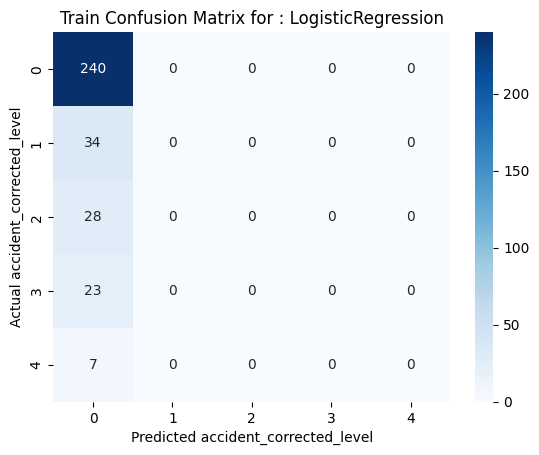

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


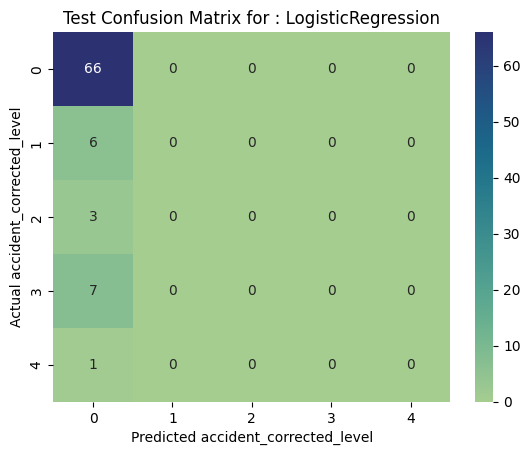

Accuracy Score with testing data - Naive Bayes: 77.11%
Accuracy Score with training data - Naive Bayes: 99.70%
Classification Metrics for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.18        83
weighted avg       0.64      0.77      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


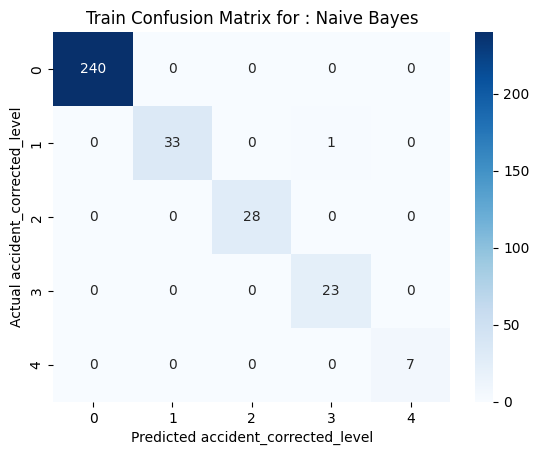

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


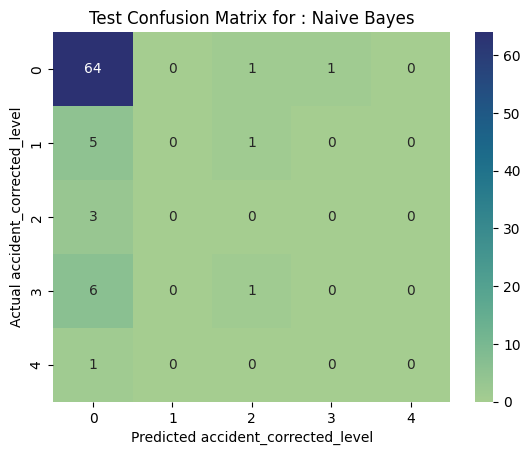

Accuracy Score with testing data - KNN: 72.29%
Accuracy Score with training data - KNN: 99.70%
Classification Metrics for KNN: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.72      0.72      0.72        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.64      0.72      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


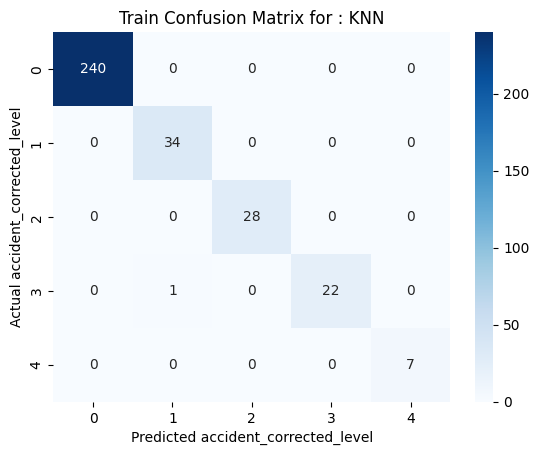

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


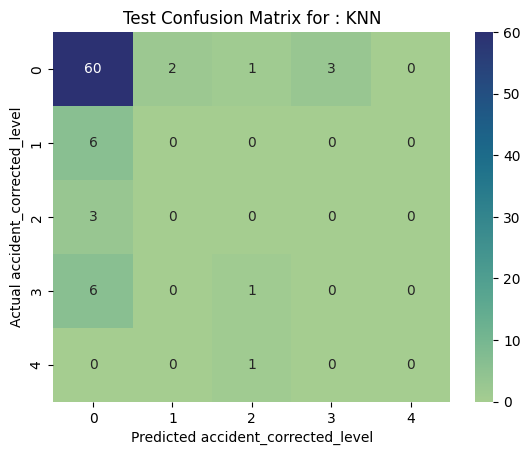

Accuracy Score with testing data - SVM: 74.70%
Accuracy Score with training data - SVM: 99.40%
Classification Metrics for SVM: 
              precision    recall  f1-score   support

           0       0.78      0.94      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.62      0.75      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


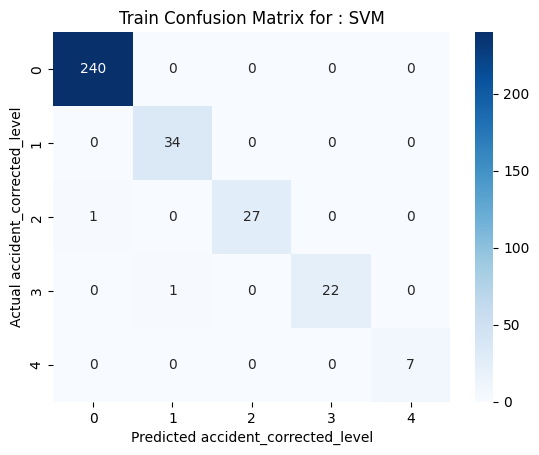

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


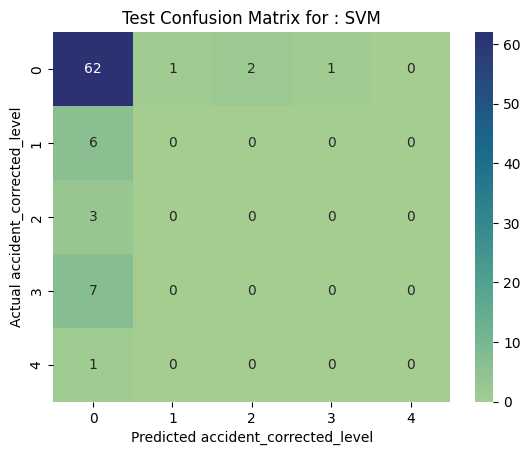

Accuracy Score with testing data - DecisionTree: 60.24%
Accuracy Score with training data - DecisionTree: 78.01%
Classification Metrics for DecisionTree: 
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        66
           1       0.09      0.17      0.12         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.60      0.60      0.60        83
   macro avg       0.17      0.18      0.17        83
weighted avg       0.61      0.60      0.60        83



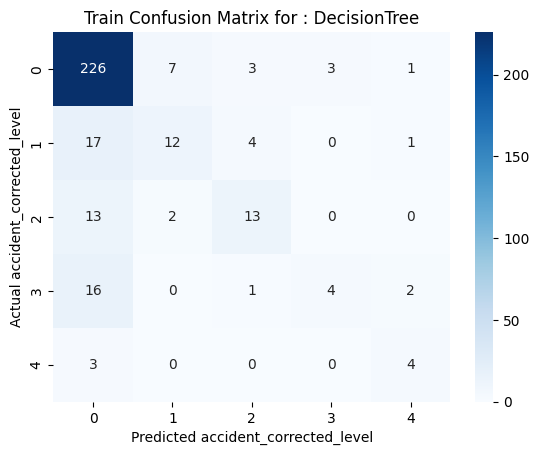

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


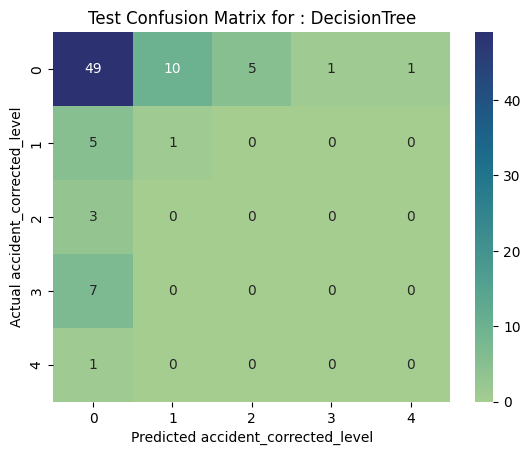

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score with testing data - RandomForest: 79.52%
Accuracy Score with training data - RandomForest: 72.29%
Classification Metrics for RandomForest: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


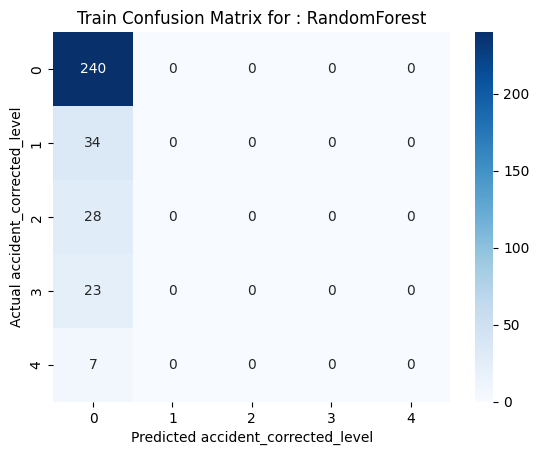

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


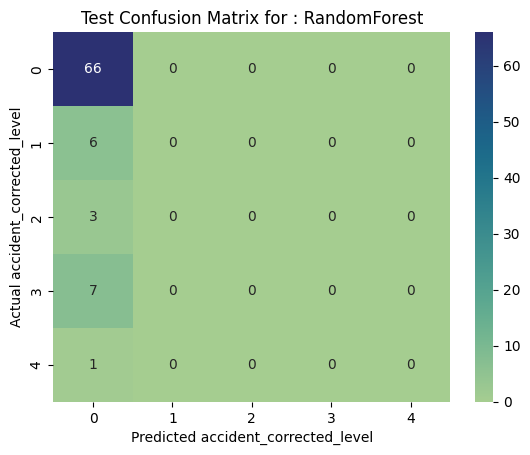

Accuracy Score with testing data - Bagging: 77.11%
Accuracy Score with training data - Bagging: 92.47%
Classification Metrics for Bagging: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.77      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


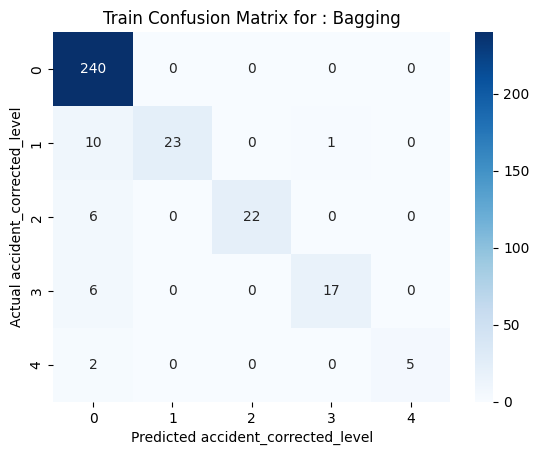

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


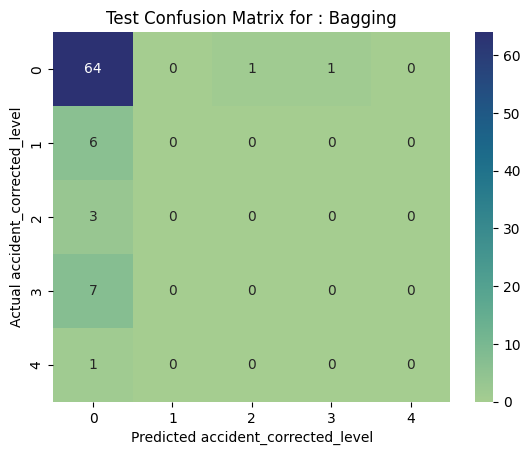

Accuracy Score with testing data - AdaBoost: 75.90%
Accuracy Score with training data - AdaBoost: 73.80%
Classification Metrics for AdaBoost: 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.76      0.76      0.76        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.76      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


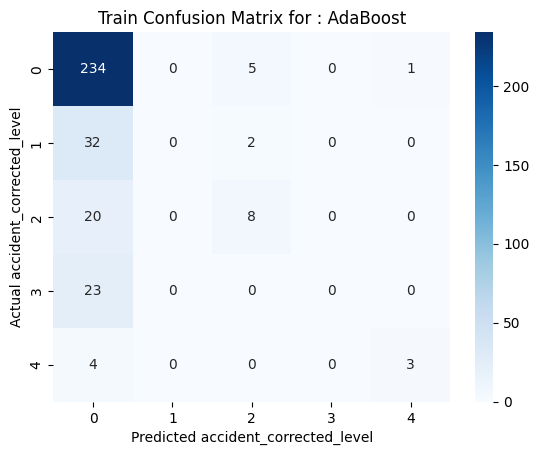

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


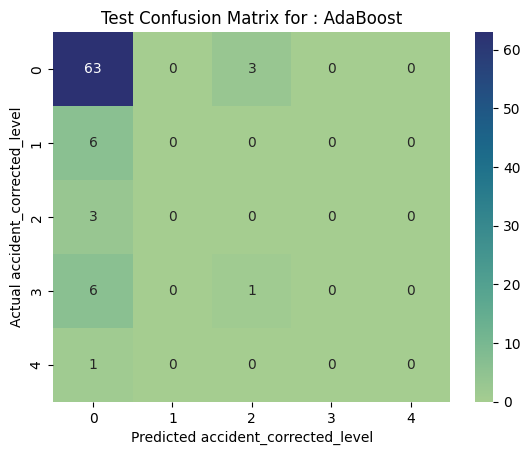

Accuracy Score with testing data - Gradient Boost: 72.29%
Accuracy Score with training data - Gradient Boost: 99.70%
Classification Metrics for Gradient Boost: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.72      0.72      0.72        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.64      0.72      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


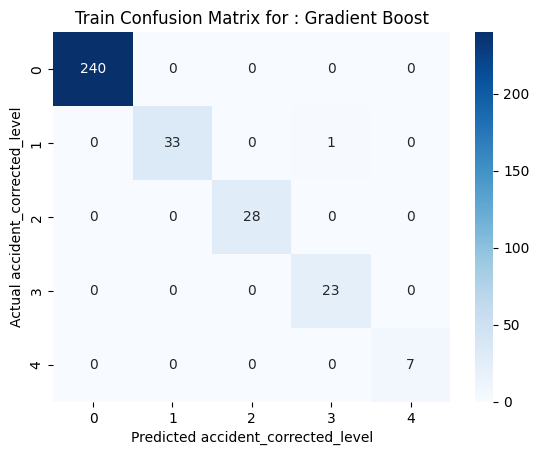

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


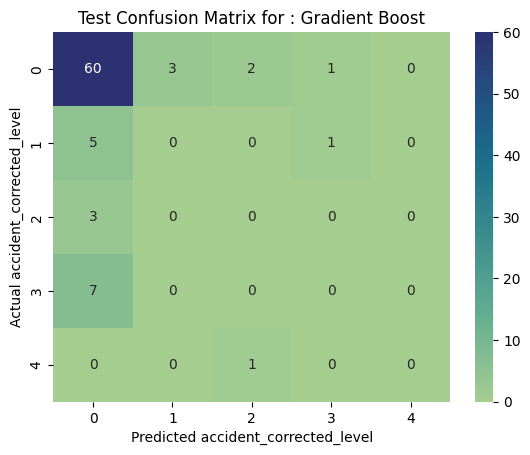

Accuracy Score with testing data - XGBoost: 77.11%
Accuracy Score with training data - XGBoost: 99.70%
Classification Metrics for XGBoost: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.77      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


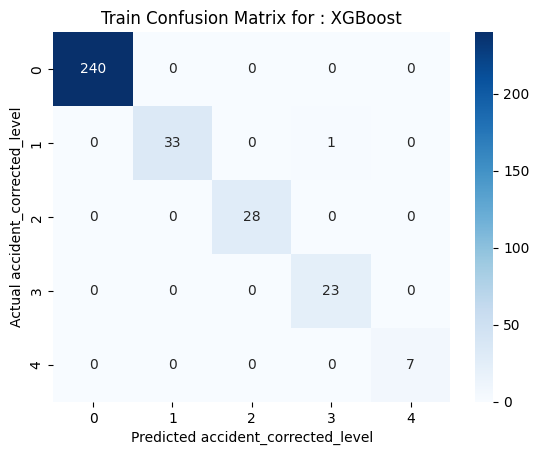

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


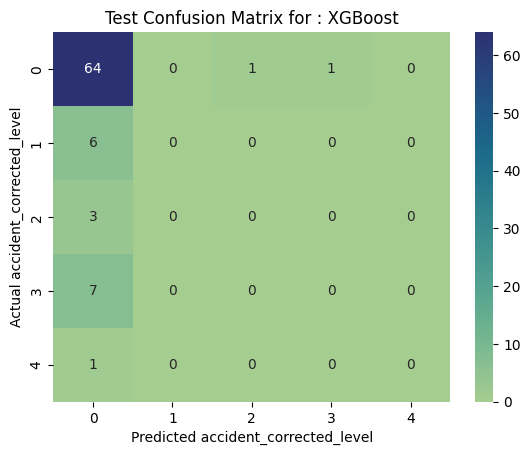

Embedding  \
LogisticRegression     tfidf   
Naive Bayes            tfidf   
KNN                    tfidf   
SVM                    tfidf   
DecisionTree           tfidf   
RandomForest           tfidf   
Bagging                tfidf   
AdaBoost               tfidf   
Gradient Boost         tfidf   
XGBoost                tfidf   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=557218362...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.722892   0.795181  
Naive Bayes           0.996988   0.771084  
KNN                   0.996988   0.722892  
SVM                   0.993976   0.746988  
DecisionTree           0.78012    0.60241  
RandomForest          0.722892   0.795181  
Bagging               0.924699   0.771084  
AdaBoost              0.737952   0.759036  
Gradient Boost        0.996988   0.722892  
XGBoost               0.996988   0.771084

In [404]:
# Fit the models using TFIDF embeddings
print ("Fitting ML classifiers using TFIDF embeddings: ")
fitted_models_tfidf = fit_models('tfidf',models, X_tfidf, data['Accident Level'])
result_df = {}

result_df = pd.DataFrame(fitted_models_tfidf)
result_tfidf = result_df.transpose()

result_tfidf

In [405]:
result_tfidf

Embedding  \
LogisticRegression     tfidf   
Naive Bayes            tfidf   
KNN                    tfidf   
SVM                    tfidf   
DecisionTree           tfidf   
RandomForest           tfidf   
Bagging                tfidf   
AdaBoost               tfidf   
Gradient Boost         tfidf   
XGBoost                tfidf   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=557218362...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.722892   0.795181  
Naive Bayes           0.996988   0.771084  
KNN                   0.996988   0.722892  
SVM                   0.993976   0.746988  
DecisionTree           0.78012    0.60241  
RandomForest          0.722892   0.795181  
Bagging               0.924699   0.771084  
AdaBoost              0.737952   0.759036  
Gradient Boost        0.996988   0.722892  
XGBoost               0.996988   0.771084

Fitting ML classifiers using CountVectorizer embeddings:
Accuracy Score with testing data - LogisticRegression: 73.49%
Accuracy Score with training data - LogisticRegression: 99.10%
Classification Metrics for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.73      0.73      0.73        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.64      0.73      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


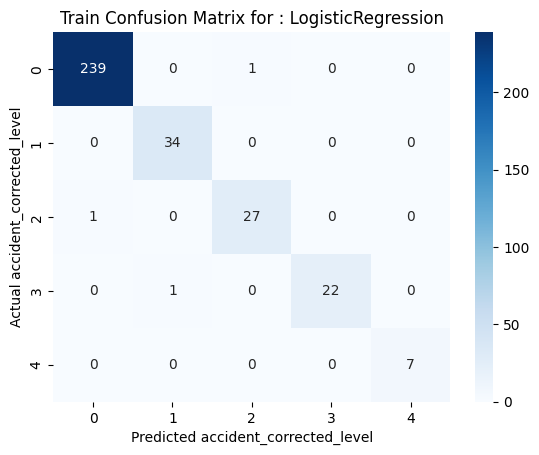

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


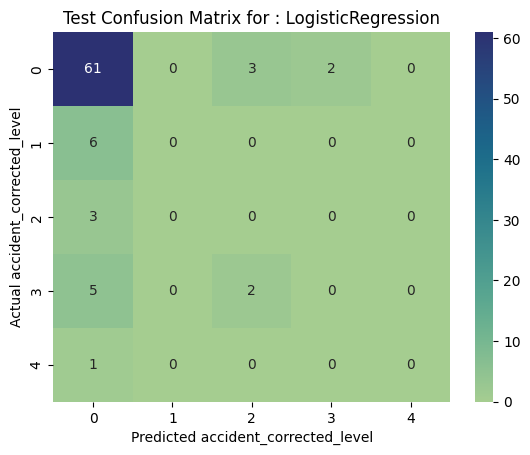

Accuracy Score with testing data - Naive Bayes: 78.31%
Accuracy Score with training data - Naive Bayes: 99.10%
Classification Metrics for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.65      0.78      0.71        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


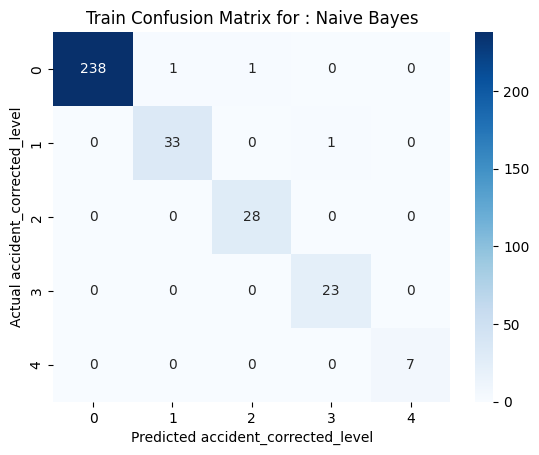

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


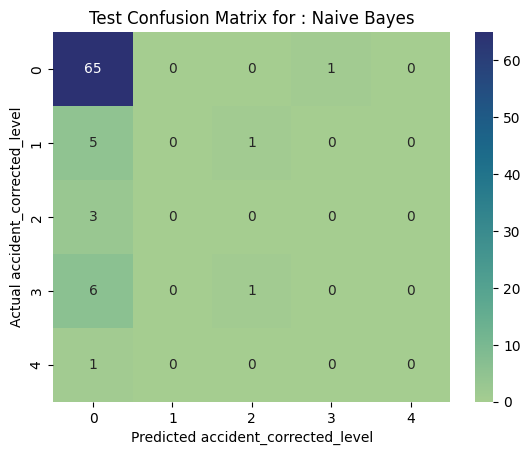

Accuracy Score with testing data - KNN: 77.11%
Accuracy Score with training data - KNN: 99.70%
Classification Metrics for KNN: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.77      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


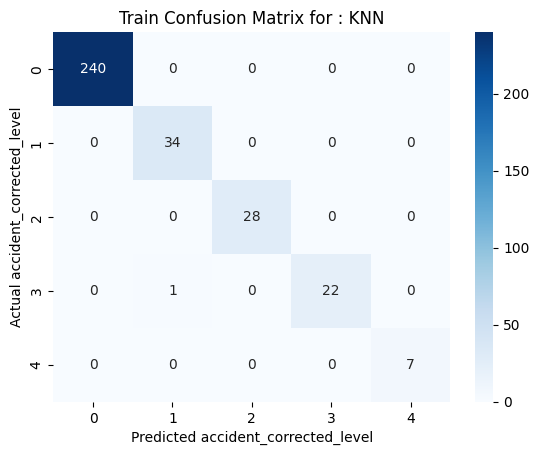

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


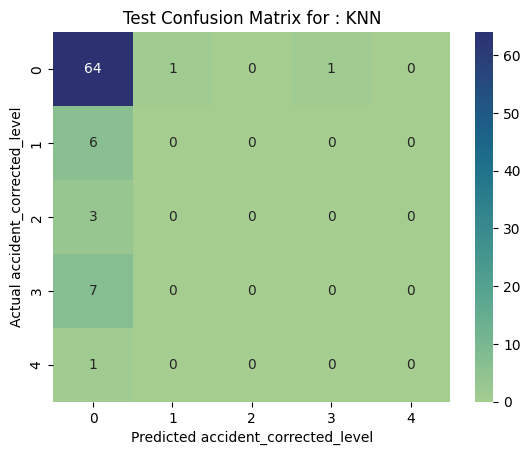

Accuracy Score with testing data - SVM: 66.27%
Accuracy Score with training data - SVM: 99.70%
Classification Metrics for SVM: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        66
           1       0.17      0.17      0.17         6
           2       0.12      0.33      0.18         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.66      0.66      0.66        83
   macro avg       0.22      0.26      0.23        83
weighted avg       0.66      0.66      0.66        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


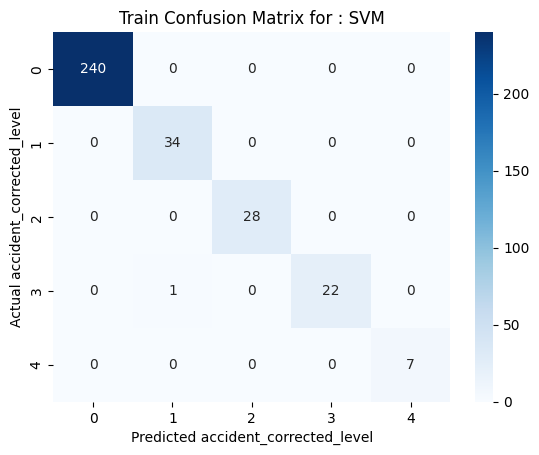

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


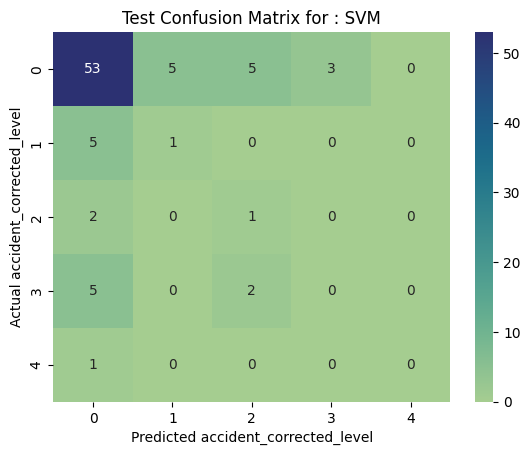

Accuracy Score with testing data - DecisionTree: 68.67%
Accuracy Score with training data - DecisionTree: 76.51%
Classification Metrics for DecisionTree: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        83
   macro avg       0.26      0.20      0.21        83
weighted avg       0.67      0.69      0.67        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


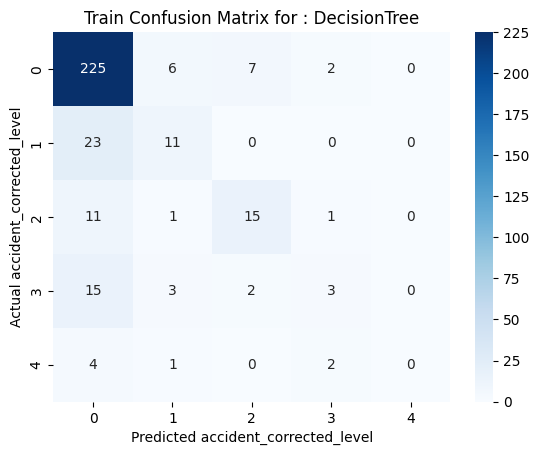

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


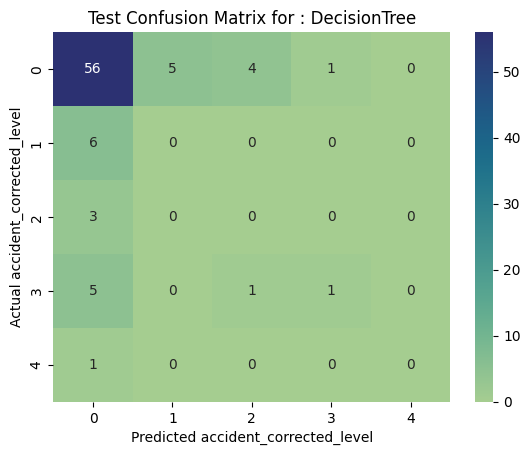

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score with testing data - RandomForest: 79.52%
Accuracy Score with training data - RandomForest: 72.29%
Classification Metrics for RandomForest: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


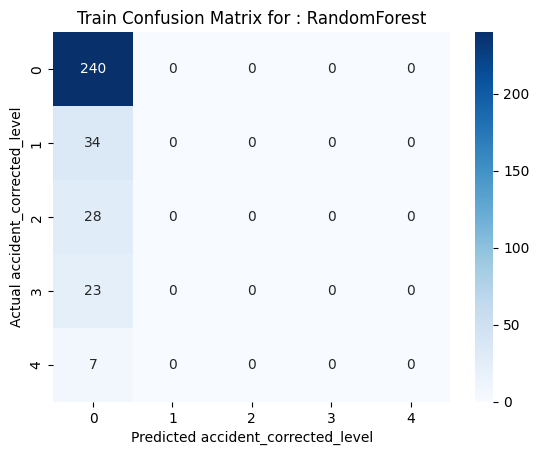

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


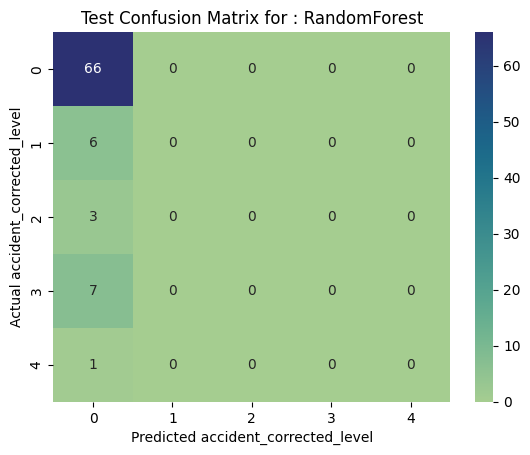

Accuracy Score with testing data - Bagging: 75.90%
Accuracy Score with training data - Bagging: 95.78%
Classification Metrics for Bagging: 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.76      0.76      0.76        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.76      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


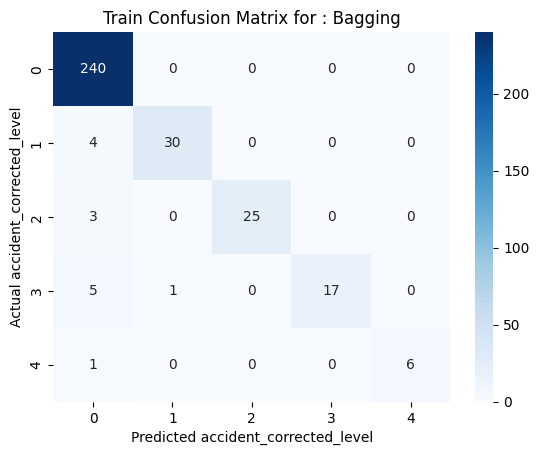

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


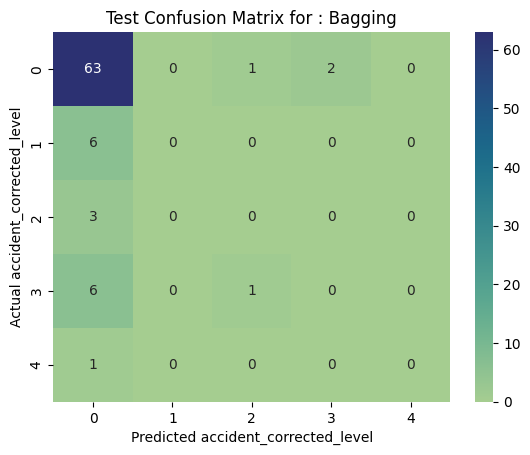

Accuracy Score with testing data - AdaBoost: 69.88%
Accuracy Score with training data - AdaBoost: 69.88%
Classification Metrics for AdaBoost: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        66
           1       0.17      0.17      0.17         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.70      0.70      0.70        83
   macro avg       0.19      0.21      0.20        83
weighted avg       0.64      0.70      0.67        83



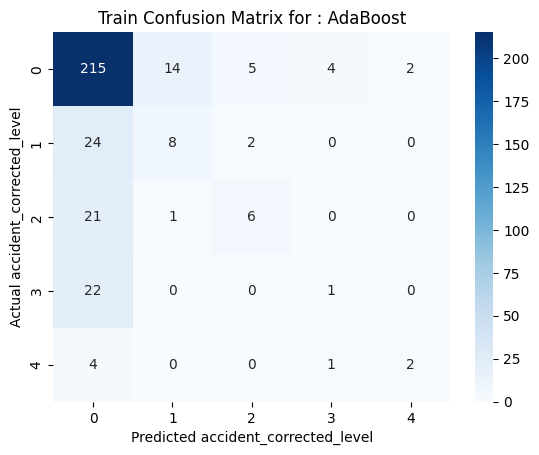

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


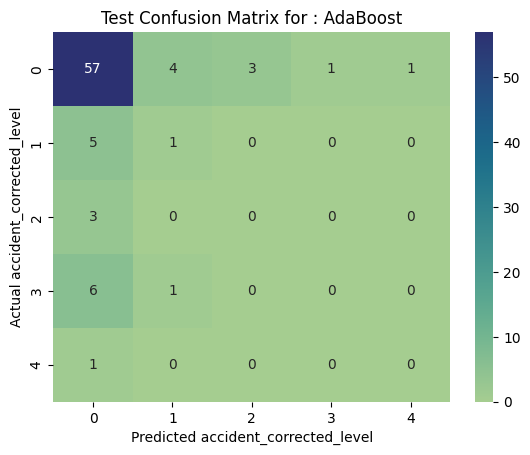

Accuracy Score with testing data - Gradient Boost: 69.88%
Accuracy Score with training data - Gradient Boost: 95.48%
Classification Metrics for Gradient Boost: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.70      0.70      0.70        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.65      0.70      0.67        83



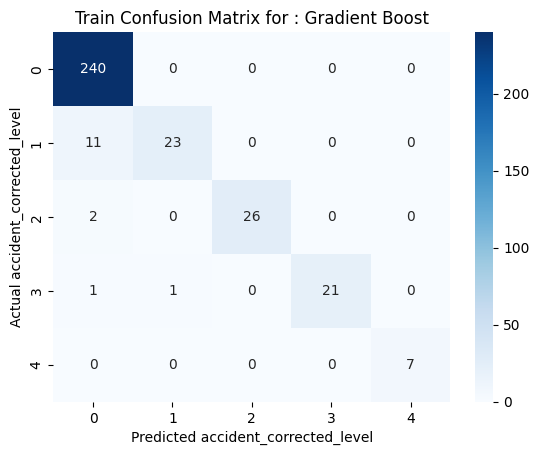

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


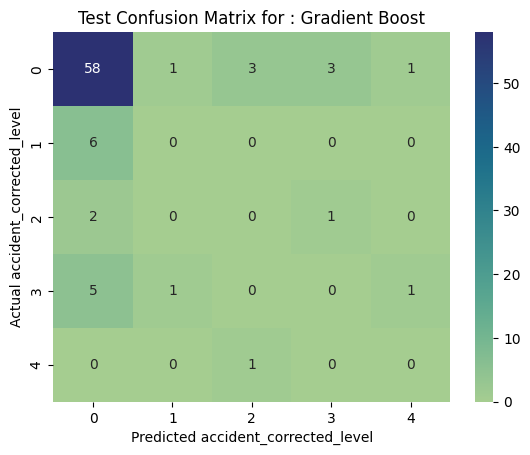

Accuracy Score with testing data - XGBoost: 74.70%
Accuracy Score with training data - XGBoost: 96.08%
Classification Metrics for XGBoost: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.75      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


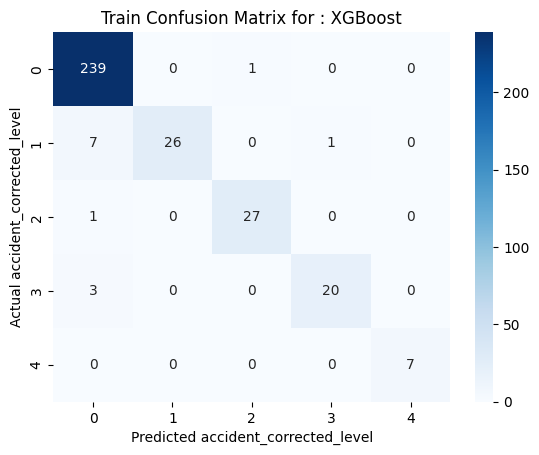

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


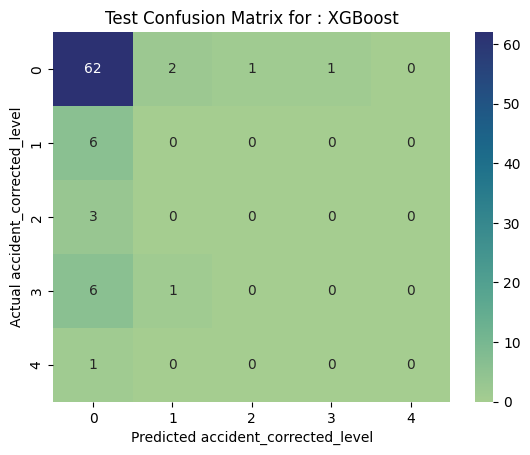

Embedding  \
LogisticRegression  CountVectorizer   
Naive Bayes         CountVectorizer   
KNN                 CountVectorizer   
SVM                 CountVectorizer   
DecisionTree        CountVectorizer   
RandomForest        CountVectorizer   
Bagging             CountVectorizer   
AdaBoost            CountVectorizer   
Gradient Boost      CountVectorizer   
XGBoost             CountVectorizer   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=320741037...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.990964    0.73494  
Naive Bayes           0.990964   0.783133  
KNN                   0.996988   0.771084  
SVM                   0.996988   0.662651  
DecisionTree           0.76506   0.686747  
RandomForest          0.722892   0.795181  
Bagging               0.957831   0.759036  
AdaBoost              0.698795   0.698795  
Gradient Boost        0.954819   0.698795  
XGBoost               0.960843   0.746988

In [406]:
# Fit the models using CountVectorizer embeddings
print ("Fitting ML classifiers using CountVectorizer embeddings:")
fitted_models_Cvect = fit_models('CountVectorizer', models, X_Cvect, data['Accident Level'])

result_df = {}
result_df = pd.DataFrame(fitted_models_Cvect)
result_Cvect = result_df.transpose()

result_Cvect

Fitting ML classifiers using FastText embeddings:
Accuracy Score with testing data - LogisticRegression: 79.52%
Accuracy Score with training data - LogisticRegression: 72.29%
Classification Metrics for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


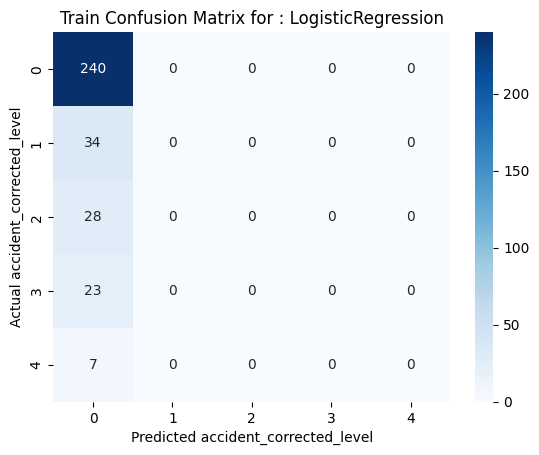

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


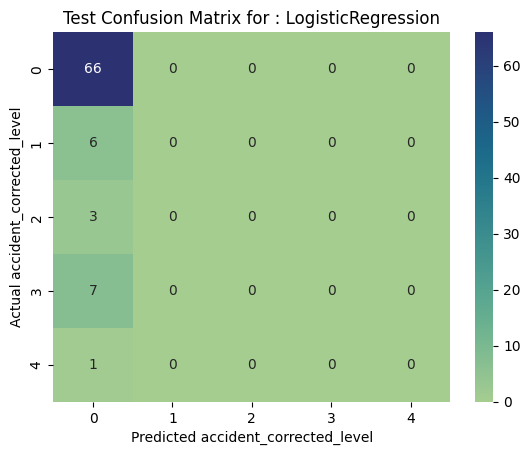

Accuracy Score with testing data - Naive Bayes: 14.46%
Accuracy Score with training data - Naive Bayes: 13.55%
Classification Metrics for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.64      0.14      0.23        66
           1       0.00      0.00      0.00         6
           2       0.20      0.67      0.31         3
           3       0.06      0.14      0.08         7
           4       0.00      0.00      0.00         1

   micro avg       0.14      0.14      0.14        83
   macro avg       0.18      0.19      0.12        83
weighted avg       0.52      0.14      0.20        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


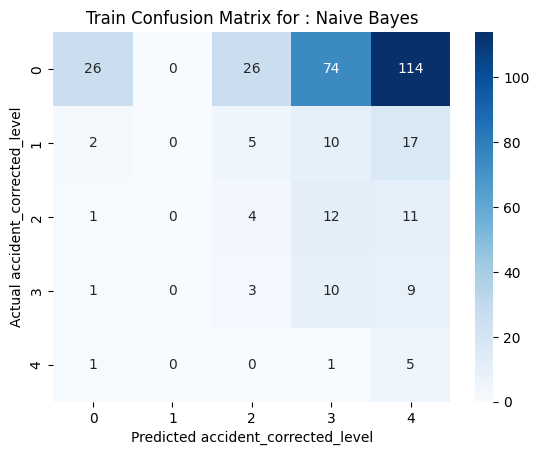

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


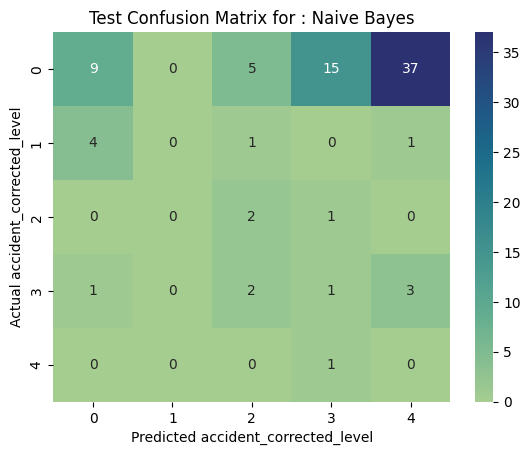

Accuracy Score with testing data - KNN: 71.08%
Accuracy Score with training data - KNN: 99.70%
Classification Metrics for KNN: 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.62      0.71      0.66        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


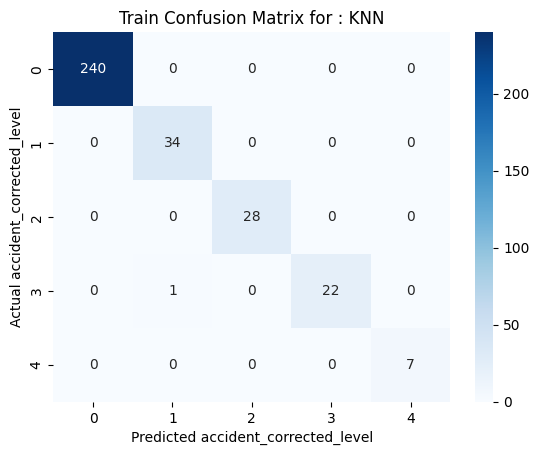

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


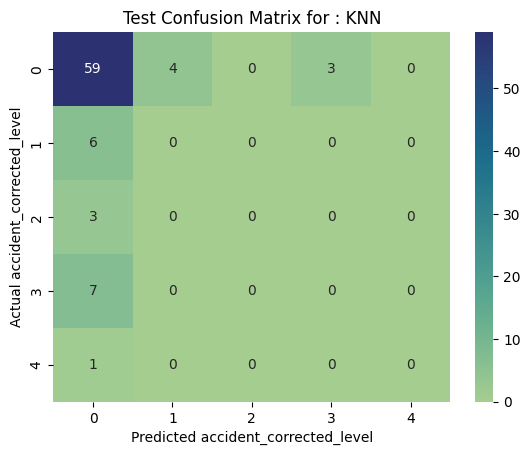

Accuracy Score with testing data - SVM: 79.52%
Accuracy Score with training data - SVM: 72.29%
Classification Metrics for SVM: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


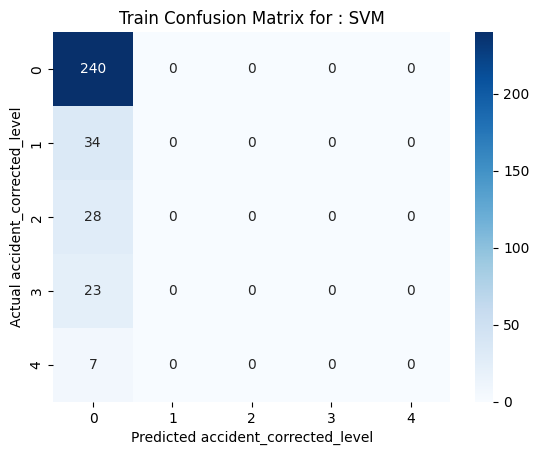

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


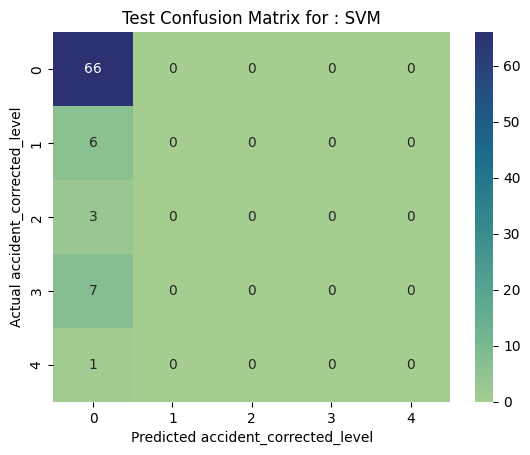

Accuracy Score with testing data - DecisionTree: 73.49%
Accuracy Score with training data - DecisionTree: 76.51%
Classification Metrics for DecisionTree: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.73      0.73      0.73        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.63      0.73      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


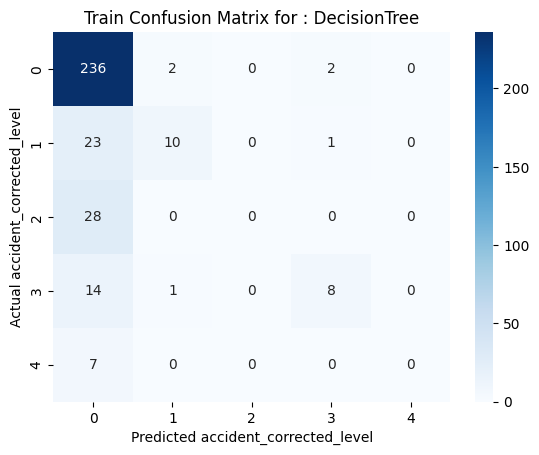

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


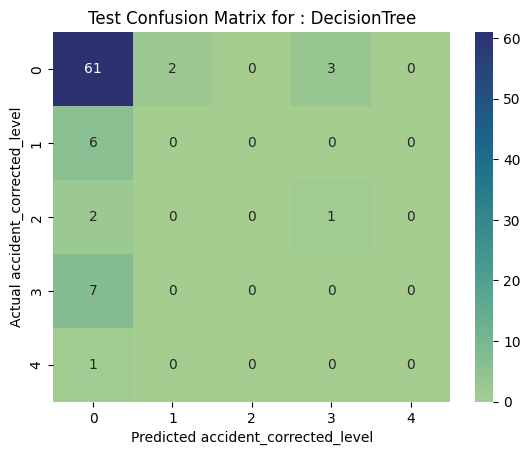

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score with testing data - RandomForest: 79.52%
Accuracy Score with training data - RandomForest: 72.29%
Classification Metrics for RandomForest: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


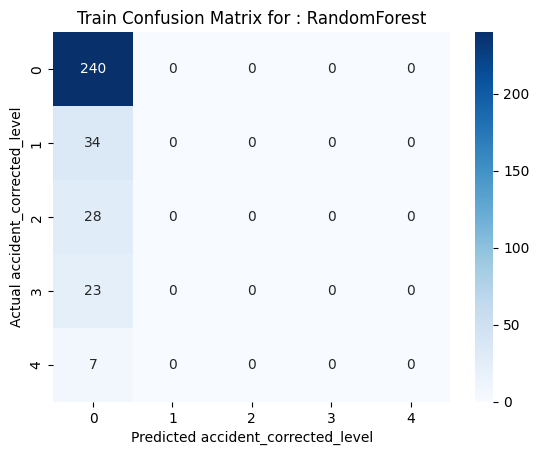

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


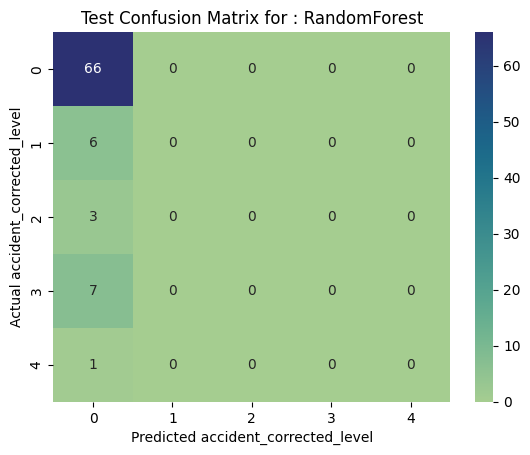

Accuracy Score with testing data - Bagging: 79.52%
Accuracy Score with training data - Bagging: 94.28%
Classification Metrics for Bagging: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


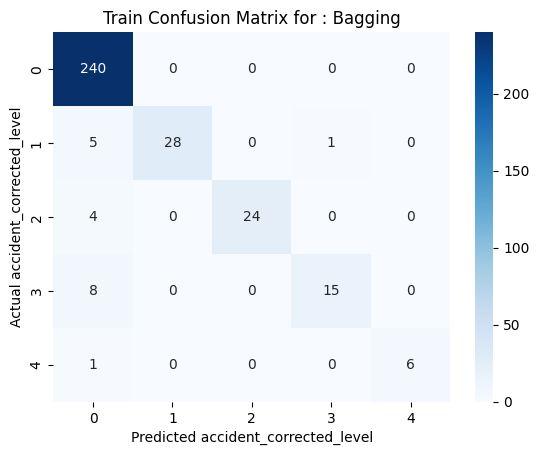

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


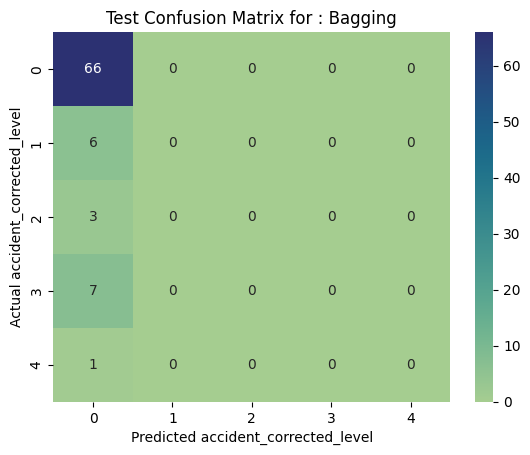

Accuracy Score with testing data - AdaBoost: 68.67%
Accuracy Score with training data - AdaBoost: 64.76%
Classification Metrics for AdaBoost: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        83
   macro avg       0.16      0.17      0.17        83
weighted avg       0.63      0.69      0.66        83



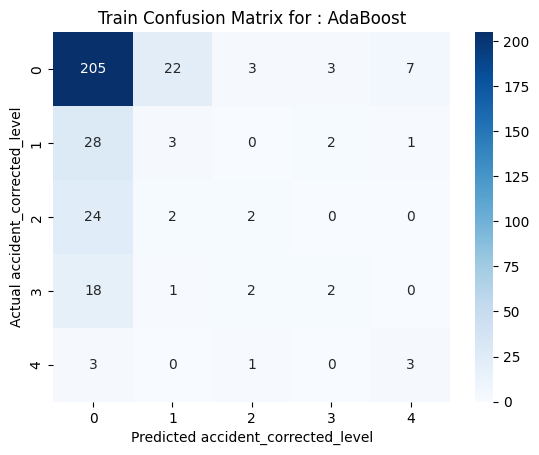

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


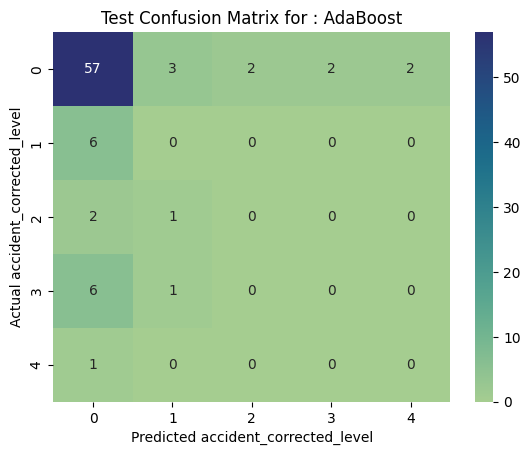

Accuracy Score with testing data - Gradient Boost: 73.49%
Accuracy Score with training data - Gradient Boost: 99.10%
Classification Metrics for Gradient Boost: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        66
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.73      0.73      0.73        83
   macro avg       0.26      0.22      0.22        83
weighted avg       0.67      0.73      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


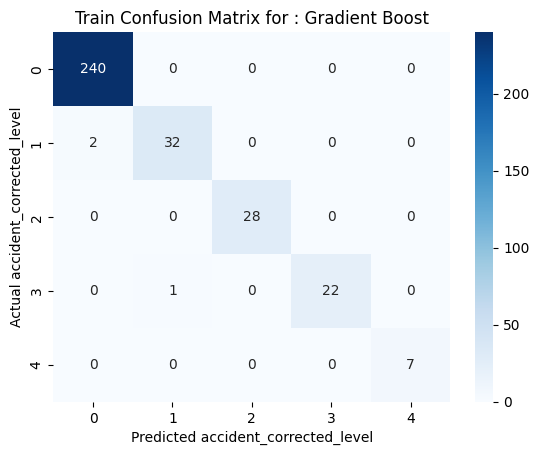

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


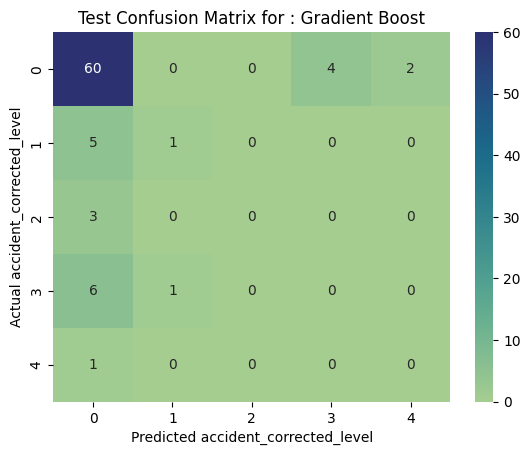

Accuracy Score with testing data - XGBoost: 74.70%
Accuracy Score with training data - XGBoost: 98.80%
Classification Metrics for XGBoost: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.75      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


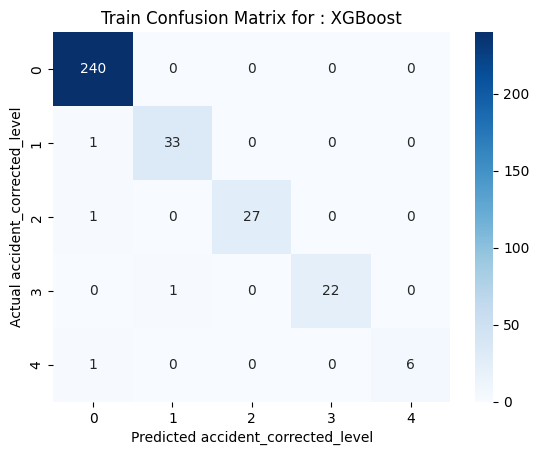

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


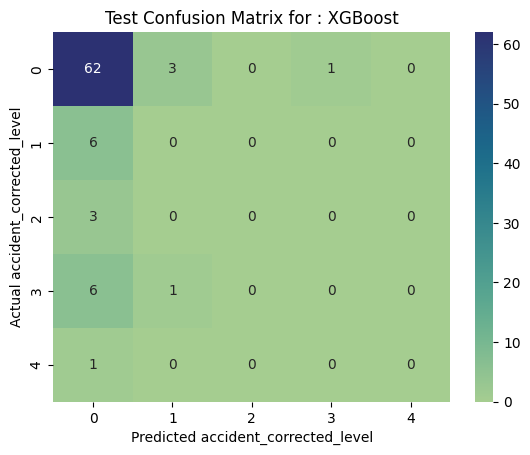

Embedding  \
LogisticRegression  FastText   
Naive Bayes         FastText   
KNN                 FastText   
SVM                 FastText   
DecisionTree        FastText   
RandomForest        FastText   
Bagging             FastText   
AdaBoost            FastText   
Gradient Boost      FastText   
XGBoost             FastText   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=110575157...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.722892   0.795181  
Naive Bayes           0.135542   0.144578  
KNN                   0.996988   0.710843  
SVM                   0.722892   0.795181  
DecisionTree           0.76506    0.73494  
RandomForest          0.722892   0.795181  
Bagging               0.942771   0.795181  
AdaBoost               0.64759   0.686747  
Gradient Boost        0.990964    0.73494  
XGBoost               0.987952   0.746988

In [407]:
# Fit the models using FastText embeddings
print ("Fitting ML classifiers using FastText embeddings:")
fitted_models_fasttext = fit_models('FastText',models, X_fasttext, data['Accident Level'])

result_df = {}
result_df = pd.DataFrame(fitted_models_fasttext)
result_ft = result_df.transpose()

result_ft

Fitting ML classifiers using Word2Vec embeddings:
Accuracy Score with testing data - LogisticRegression: 79.52%
Accuracy Score with training data - LogisticRegression: 72.29%
Classification Metrics for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


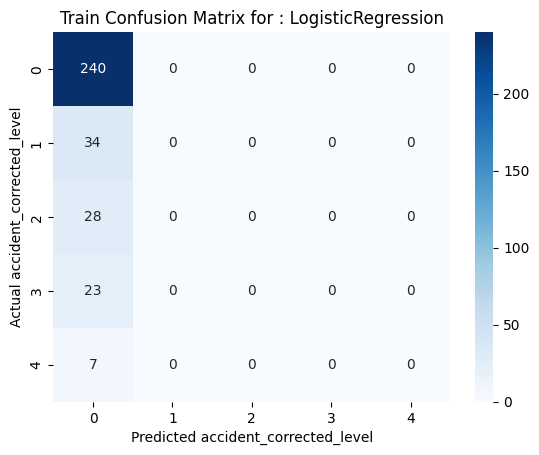

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


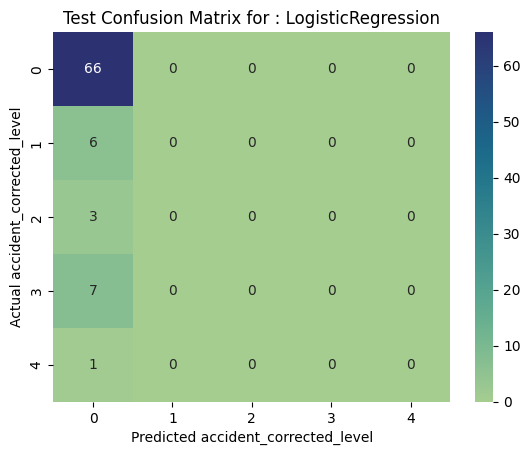

Accuracy Score with testing data - Naive Bayes: 8.43%
Accuracy Score with training data - Naive Bayes: 11.75%
Classification Metrics for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.07      0.33      0.12         6
           2       0.12      0.33      0.18         3
           3       0.14      0.57      0.23         7
           4       0.00      0.00      0.00         1

   micro avg       0.08      0.08      0.08        83
   macro avg       0.07      0.25      0.11        83
weighted avg       0.02      0.08      0.03        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


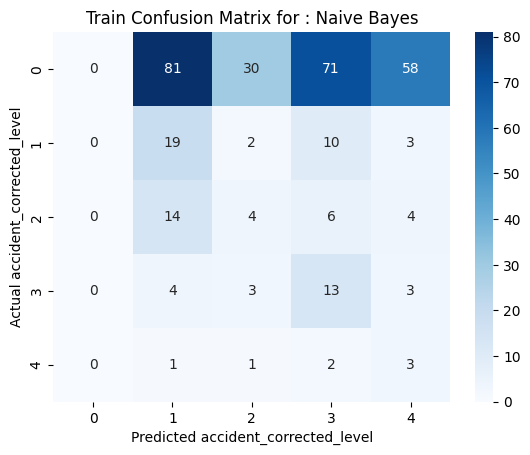

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


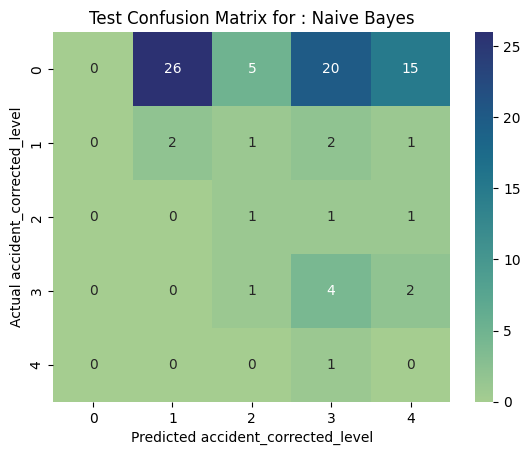

Accuracy Score with testing data - KNN: 69.88%
Accuracy Score with training data - KNN: 99.70%
Classification Metrics for KNN: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         1

   micro avg       0.70      0.70      0.70        83
   macro avg       0.19      0.20      0.19        83
weighted avg       0.65      0.70      0.67        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


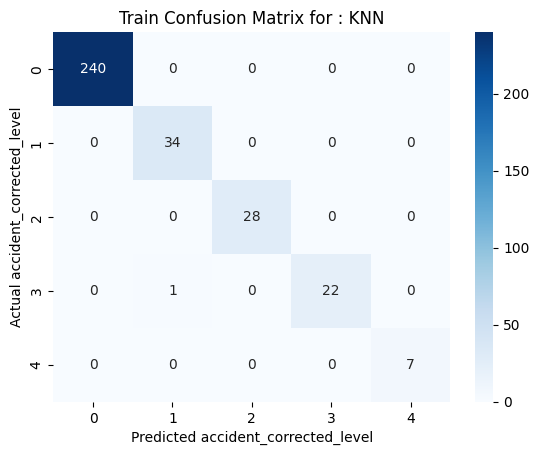

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


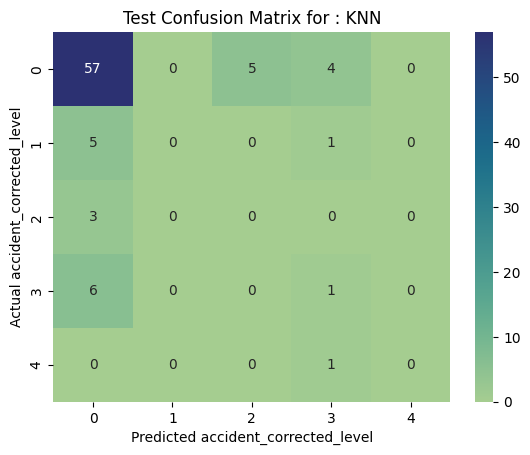

Accuracy Score with testing data - SVM: 79.52%
Accuracy Score with training data - SVM: 72.29%
Classification Metrics for SVM: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


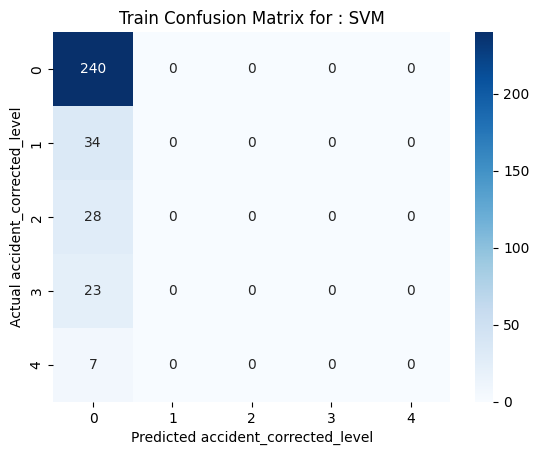

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


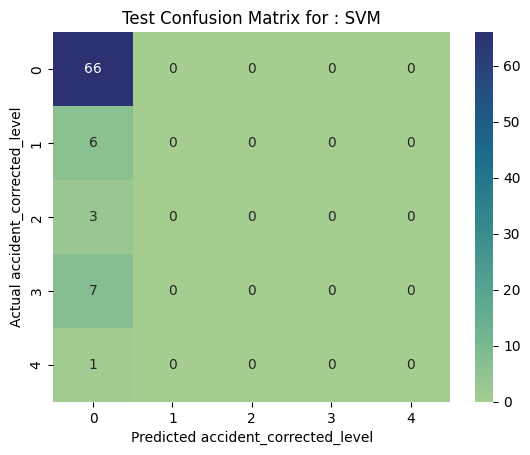

Accuracy Score with testing data - DecisionTree: 71.08%
Accuracy Score with training data - DecisionTree: 80.72%
Classification Metrics for DecisionTree: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.17      0.17      0.17         6
           2       0.00      0.00      0.00         3
           3       0.33      0.29      0.31         7
           4       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71        83
   macro avg       0.26      0.26      0.26        83
weighted avg       0.68      0.71      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


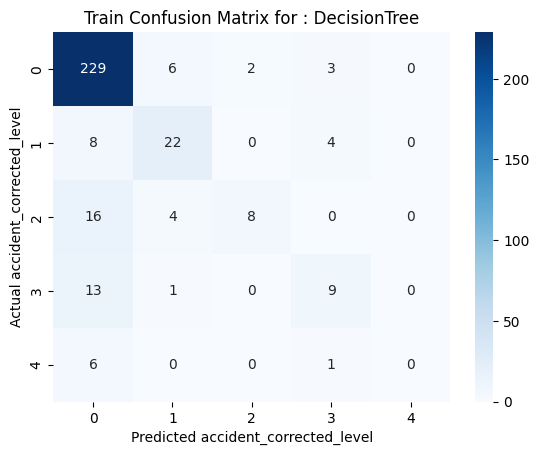

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


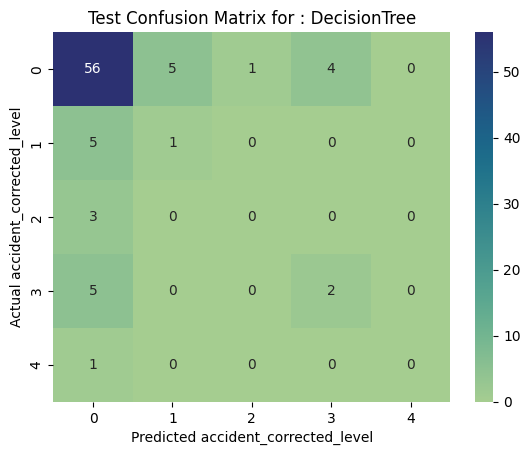

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score with testing data - RandomForest: 79.52%
Accuracy Score with training data - RandomForest: 73.80%
Classification Metrics for RandomForest: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


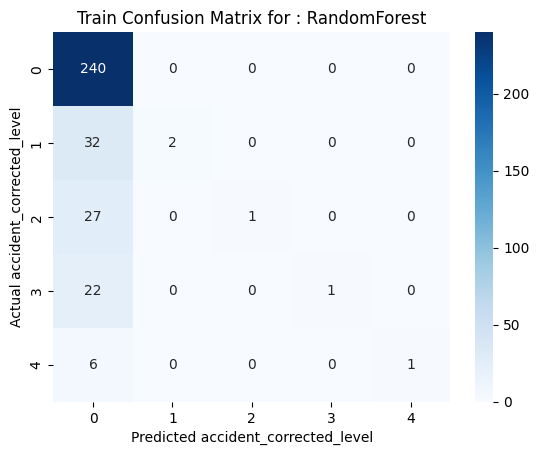

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


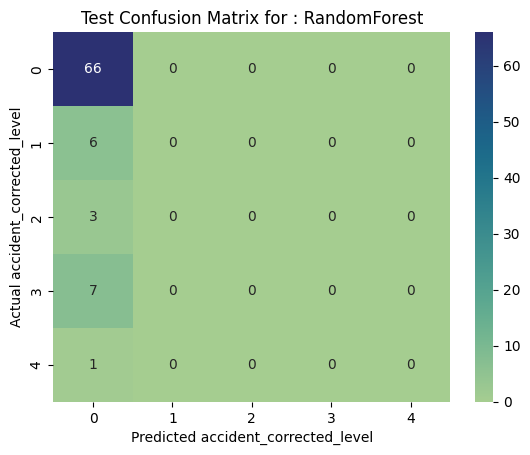

Accuracy Score with testing data - Bagging: 77.11%
Accuracy Score with training data - Bagging: 96.69%
Classification Metrics for Bagging: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.77      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


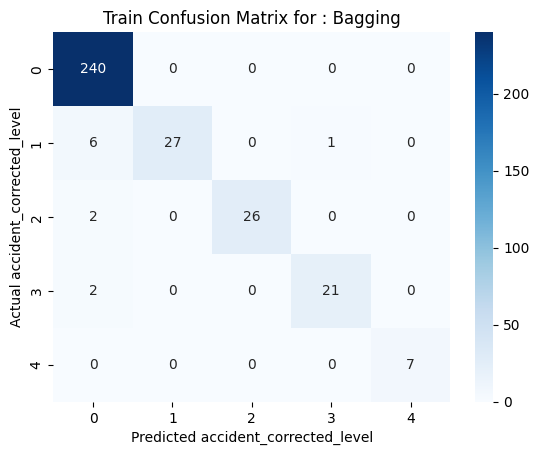

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


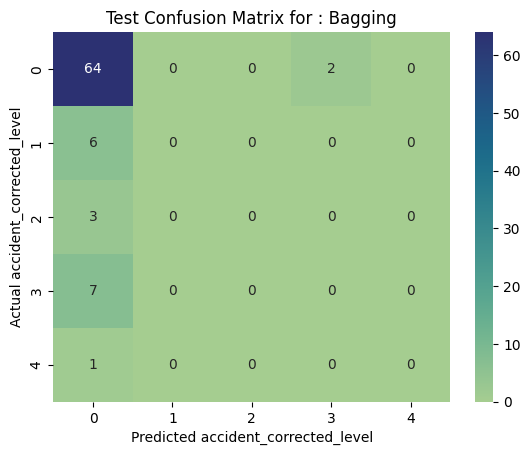

Accuracy Score with testing data - AdaBoost: 55.42%
Accuracy Score with training data - AdaBoost: 60.84%
Classification Metrics for AdaBoost: 
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.06      0.14      0.09         7
           4       0.00      0.00      0.00         1

   micro avg       0.55      0.55      0.55        83
   macro avg       0.17      0.16      0.16        83
weighted avg       0.63      0.55      0.59        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


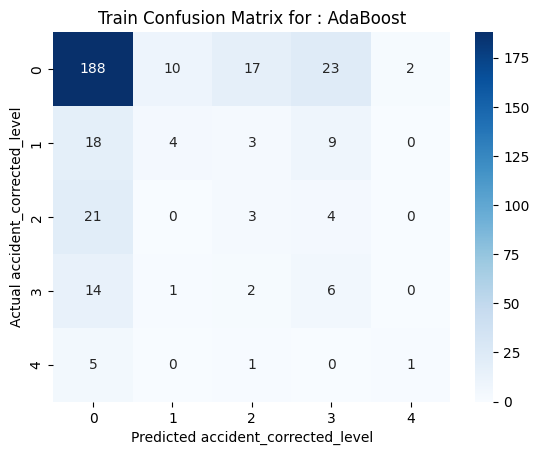

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


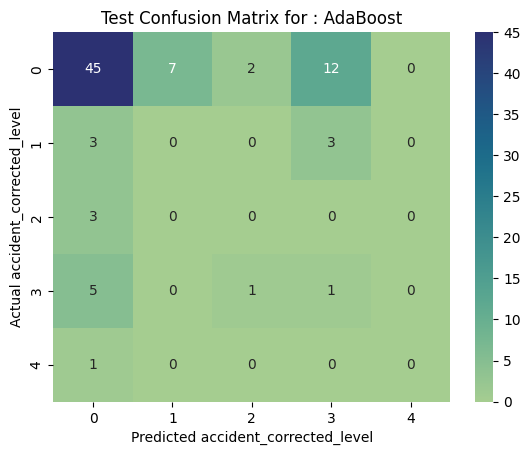

Accuracy Score with testing data - Gradient Boost: 74.70%
Accuracy Score with training data - Gradient Boost: 99.70%
Classification Metrics for Gradient Boost: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.75      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


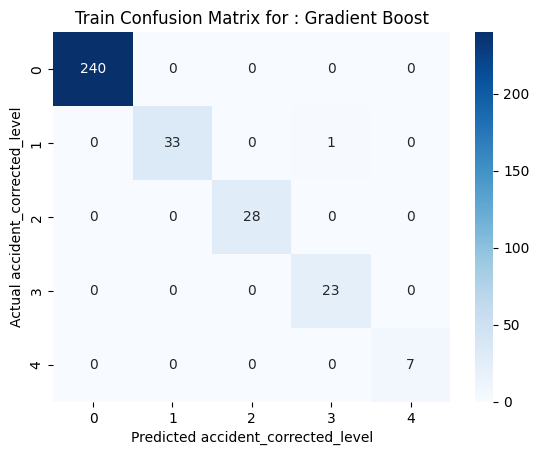

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


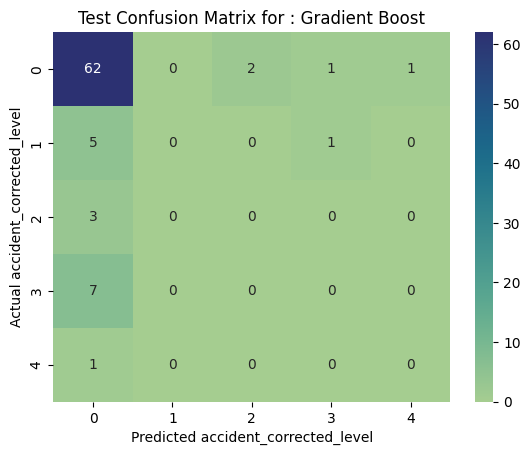

Accuracy Score with testing data - XGBoost: 74.70%
Accuracy Score with training data - XGBoost: 99.70%
Classification Metrics for XGBoost: 
              precision    recall  f1-score   support

           0       0.78      0.94      0.86        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.62      0.75      0.68        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


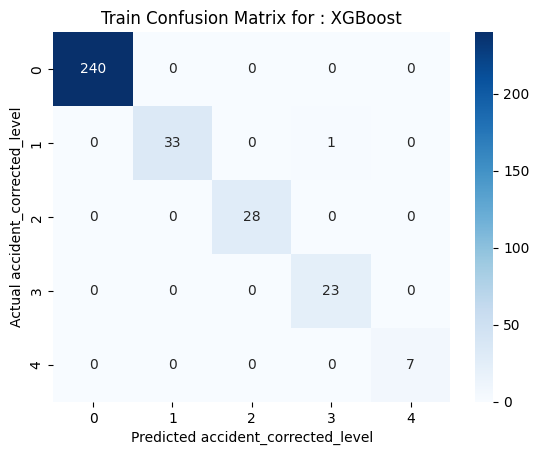

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


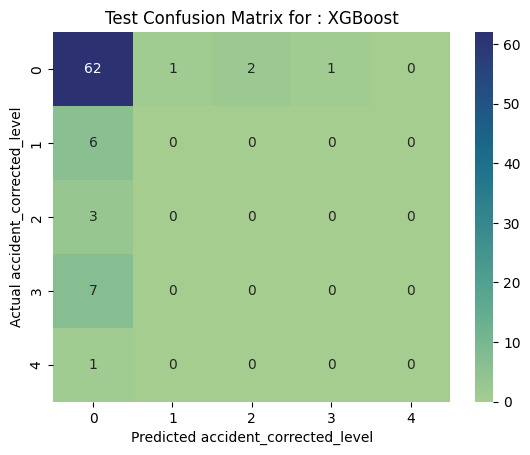

Embedding  \
LogisticRegression  Word2Vec   
Naive Bayes         Word2Vec   
KNN                 Word2Vec   
SVM                 Word2Vec   
DecisionTree        Word2Vec   
RandomForest        Word2Vec   
Bagging             Word2Vec   
AdaBoost            Word2Vec   
Gradient Boost      Word2Vec   
XGBoost             Word2Vec   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=149407120...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.722892   0.795181  
Naive Bayes            0.11747   0.084337  
KNN                   0.996988   0.698795  
SVM                   0.722892   0.795181  
DecisionTree          0.807229   0.710843  
RandomForest          0.737952   0.795181  
Bagging               0.966867   0.771084  
AdaBoost              0.608434   0.554217  
Gradient Boost        0.996988   0.746988  
XGBoost               0.996988   0.746988

In [408]:
# Fit the models using Word2Vec embeddings
print ("Fitting ML classifiers using Word2Vec embeddings:")
fitted_models_Word2Vec = fit_models('Word2Vec',models, X_Word2Vec, data['Accident Level'])

result_df = {}
result_df = pd.DataFrame(fitted_models_Word2Vec)
result_wv = result_df.transpose()

result_wv

Fitting ML classifiers using GloVe embeddings:
Accuracy Score with testing data - LogisticRegression: 79.52%
Accuracy Score with training data - LogisticRegression: 73.19%
Classification Metrics for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

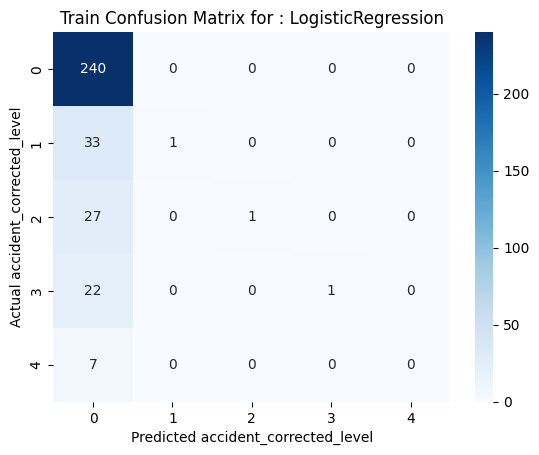

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


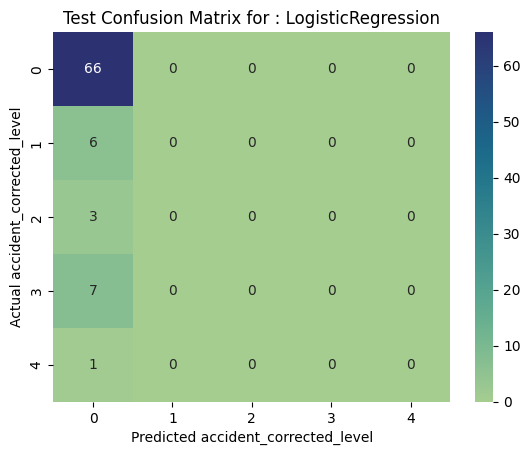

Accuracy Score with testing data - Naive Bayes: 50.60%
Accuracy Score with training data - Naive Bayes: 67.17%
Classification Metrics for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        66
           1       0.11      0.17      0.13         6
           2       0.07      0.33      0.12         3
           3       0.10      0.14      0.12         7
           4       0.00      0.00      0.00         1

   micro avg       0.51      0.51      0.51        83
   macro avg       0.22      0.25      0.21        83
weighted avg       0.67      0.51      0.57        83



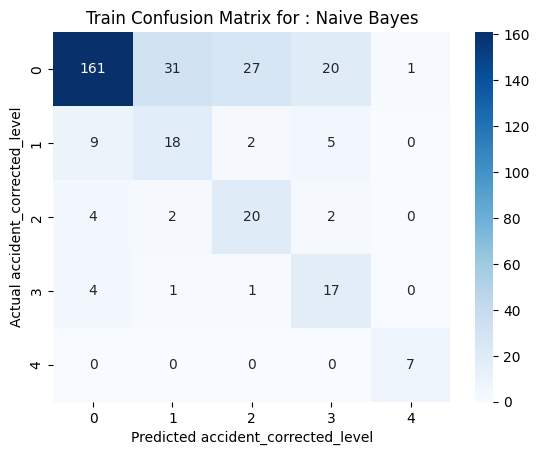

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


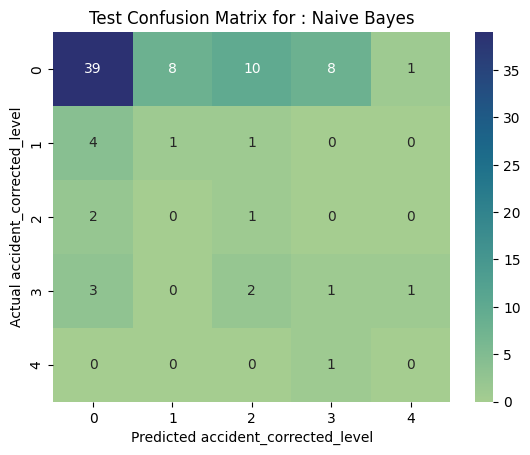

Accuracy Score with testing data - KNN: 73.49%
Accuracy Score with training data - KNN: 99.70%
Classification Metrics for KNN: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.73      0.73      0.73        83
   macro avg       0.16      0.18      0.17        83
weighted avg       0.65      0.73      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


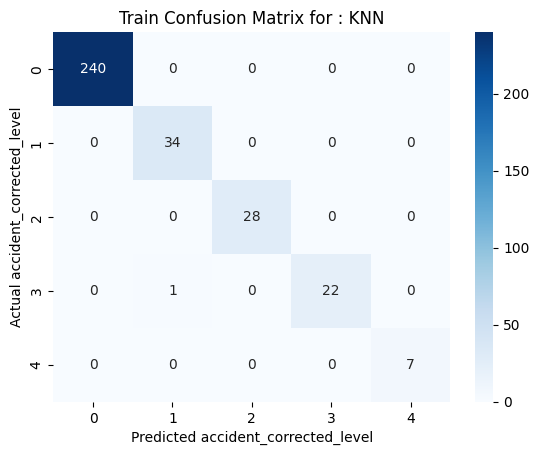

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


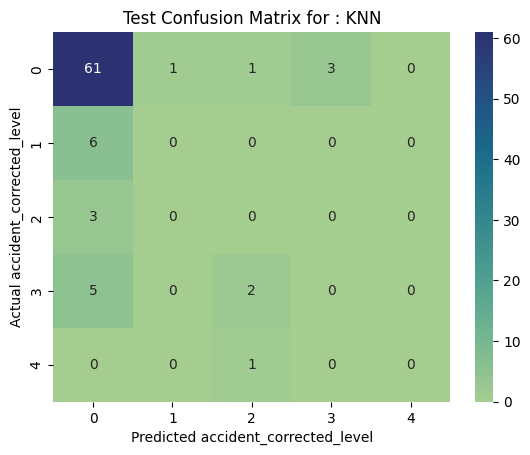

Accuracy Score with testing data - SVM: 78.31%
Accuracy Score with training data - SVM: 89.46%
Classification Metrics for SVM: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        66
           1       0.50      0.17      0.25         6
           2       0.25      0.33      0.29         3
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78        83
   macro avg       0.42      0.34      0.36        83
weighted avg       0.75      0.78      0.76        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


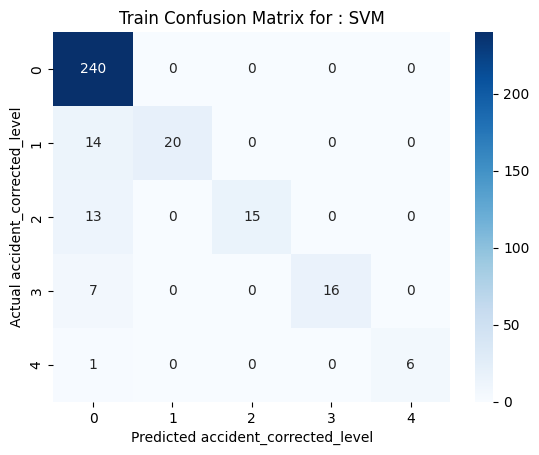

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


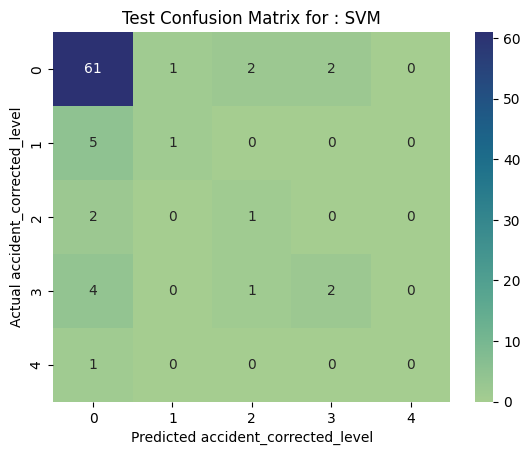

Accuracy Score with testing data - DecisionTree: 63.86%
Accuracy Score with training data - DecisionTree: 82.23%
Classification Metrics for DecisionTree: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        66
           1       0.17      0.17      0.17         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64        83
   macro avg       0.19      0.19      0.19        83
weighted avg       0.64      0.64      0.64        83



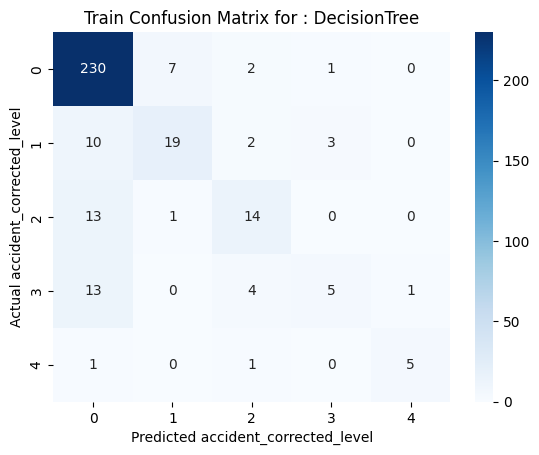

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


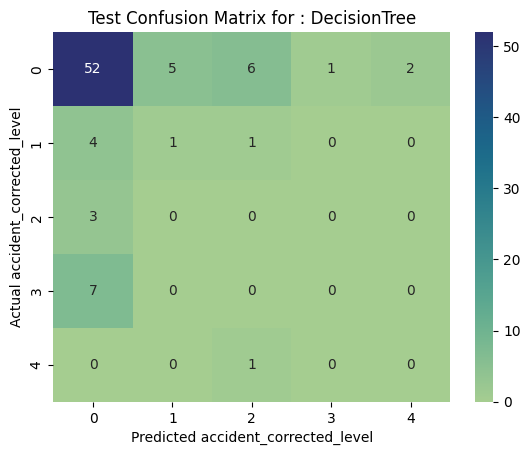

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score with testing data - RandomForest: 79.52%
Accuracy Score with training data - RandomForest: 76.51%
Classification Metrics for RandomForest: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.63      0.80      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


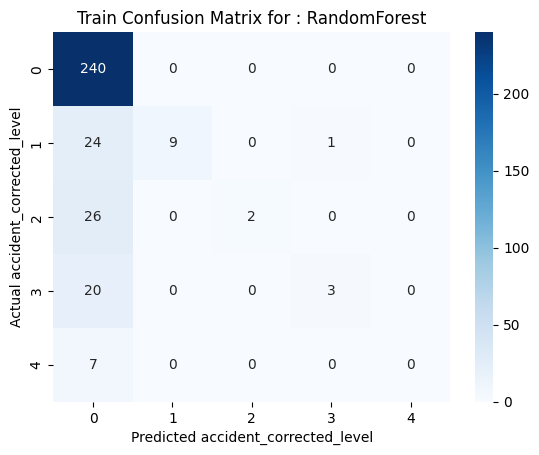

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


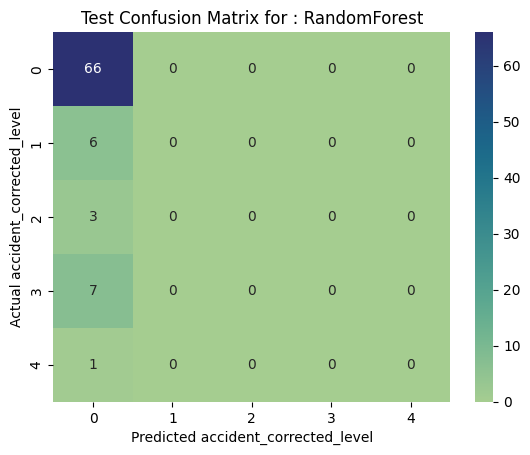

Accuracy Score with testing data - Bagging: 78.31%
Accuracy Score with training data - Bagging: 96.39%
Classification Metrics for Bagging: 
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78        83
   macro avg       0.16      0.20      0.18        83
weighted avg       0.64      0.78      0.70        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


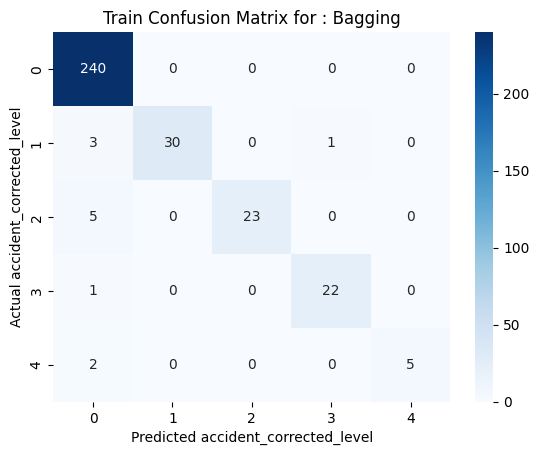

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


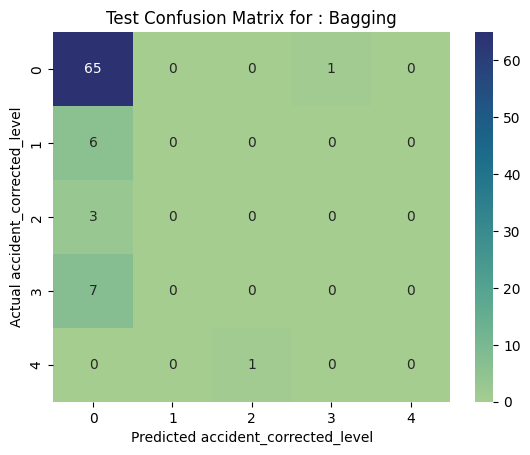

Accuracy Score with testing data - AdaBoost: 66.27%
Accuracy Score with training data - AdaBoost: 63.25%
Classification Metrics for AdaBoost: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        66
           1       0.25      0.50      0.33         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.66      0.66      0.66        83
   macro avg       0.21      0.26      0.23        83
weighted avg       0.65      0.66      0.66        83



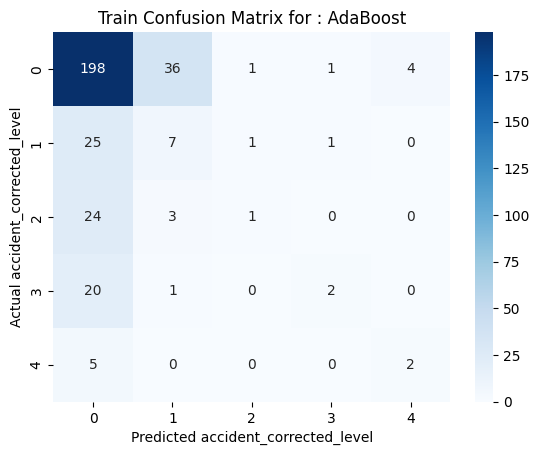

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


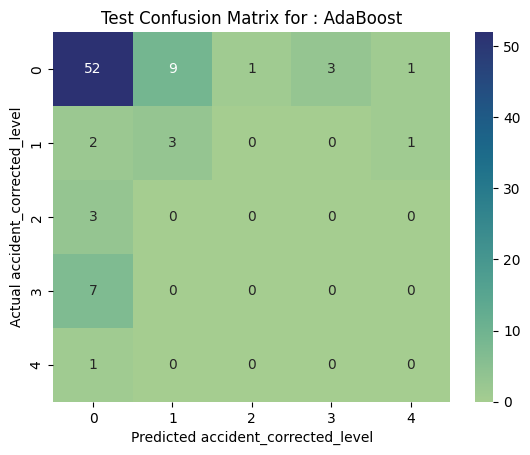

Accuracy Score with testing data - Gradient Boost: 75.90%
Accuracy Score with training data - Gradient Boost: 99.70%
Classification Metrics for Gradient Boost: 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.76      0.76      0.76        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.76      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


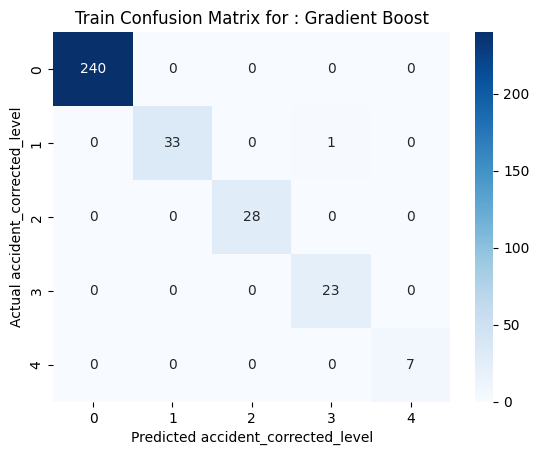

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


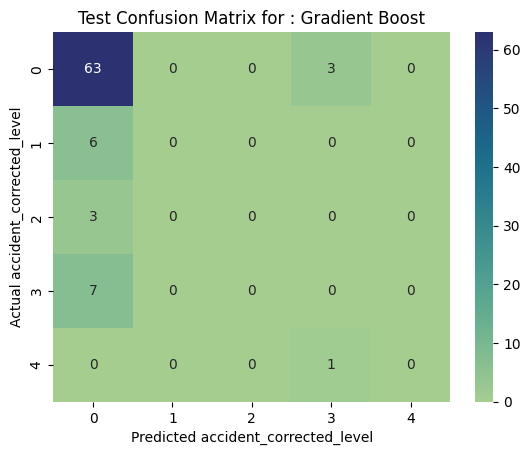

Accuracy Score with testing data - XGBoost: 77.11%
Accuracy Score with training data - XGBoost: 99.70%
Classification Metrics for XGBoost: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        66
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

   micro avg       0.77      0.77      0.77        83
   macro avg       0.16      0.19      0.17        83
weighted avg       0.63      0.77      0.69        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


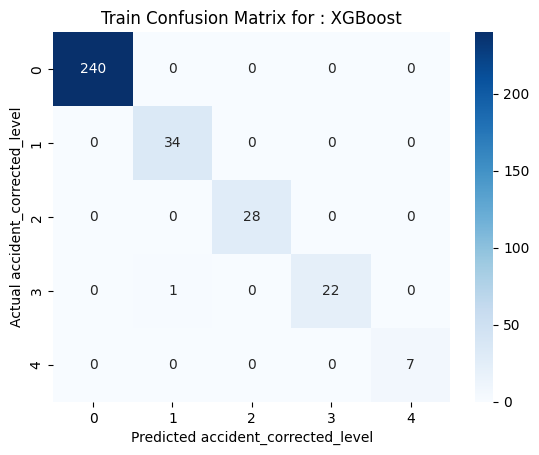

------------------------**************************&&&&&&&&&&&&&&&&&%%%%%%%%%%%%%$$$$$$$$$$-------------------


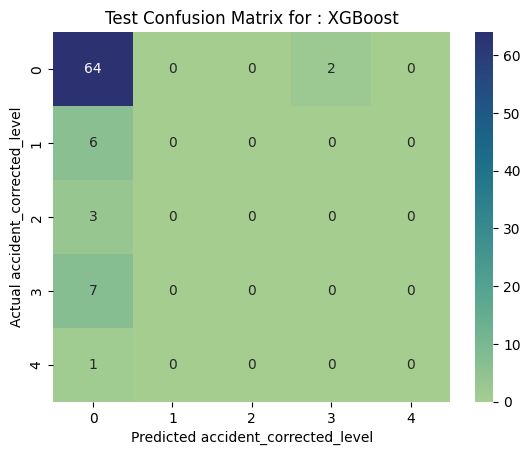

Embedding  \
LogisticRegression     GloVe   
Naive Bayes            GloVe   
KNN                    GloVe   
SVM                    GloVe   
DecisionTree           GloVe   
RandomForest           GloVe   
Bagging                GloVe   
AdaBoost               GloVe   
Gradient Boost         GloVe   
XGBoost                GloVe   

                                                                model  \
LogisticRegression                               LogisticRegression()   
Naive Bayes                                              GaussianNB()   
KNN                 KNeighborsClassifier(algorithm='kd_tree', weig...   
SVM                 SVC(C=10, gamma=0.1, kernel='linear', probabil...   
DecisionTree        DecisionTreeClassifier(criterion='entropy', ma...   
RandomForest        (DecisionTreeClassifier(max_depth=5, max_featu...   
Bagging             (DecisionTreeClassifier(random_state=140090009...   
AdaBoost            (DecisionTreeClassifier(max_depth=1, random_st...   
Gradient Boost      ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBoost             XGBClassifier(base_score=None, booster=None, c...   

                   train_score test_score  
LogisticRegression    0.731928   0.795181  
Naive Bayes           0.671687   0.506024  
KNN                   0.996988    0.73494  
SVM                   0.894578   0.783133  
DecisionTree          0.822289   0.638554  
RandomForest           0.76506   0.795181  
Bagging               0.963855   0.783133  
AdaBoost               0.63253   0.662651  
Gradient Boost        0.996988   0.759036  
XGBoost               0.996988   0.771084

In [409]:
# Fit the models using GloVe embeddings
print ("Fitting ML classifiers using GloVe embeddings:")
fitted_models_Glove = fit_models('GloVe',models, X_Glove, data['Accident Level'])

result_df = {}
result_df = pd.DataFrame(fitted_models_Glove)
result_GV = result_df.transpose()

result_GV